## Problem Statement

`An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.`

`The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.`

`Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.`

## Business Goals

`X Education wants to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.`

**`Goals for this case study:`**

- `Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.`
- `There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.`

## 1. Importing Libraries

In [1]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import uniform
from math import isnan

#Visualization Libraries
from matplotlib.pyplot import xticks
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
#Display Customizations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 2. Importing Data Dictionary

In [4]:
Data_dict = pd.read_excel('Leads Data Dictionary.xlsx', header = 2)
Data_dict.drop('Unnamed: 0', inplace = True, axis = 1)
Data_dict.reset_index(drop = True, inplace = True)
Data_dict.head(len(Data_dict))

Variables  \
0                                        Prospect ID   
1                                        Lead Number   
2                                        Lead Origin   
3                                        Lead Source   
4                                       Do Not Email   
5                                        Do Not Call   
6                                          Converted   
7                                        TotalVisits   
8                        Total Time Spent on Website   
9                               Page Views Per Visit   
10                                     Last Activity   
11                                           Country   
12                                    Specialization   
13                How did you hear about X Education   
14                   What is your current occupation   
15  What matters most to you in choosing this course   
16                                            Search   
17                                          Magazine   
18                                 Newspaper Article   
19                                X Education Forums   
20                                         Newspaper   
21                             Digital Advertisement   
22                           Through Recommendations   
23            Receive More Updates About Our Courses   
24                                              Tags   
25                                      Lead Quality   
26                 Update me on Supply Chain Content   
27                         Get updates on DM Content   
28                                      Lead Profile   
29                                              City   
30                       Asymmetrique Activity Index   
31                        Asymmetrique Profile Index   
32                       Asymmetrique Activity Score   
33                        Asymmetrique Profile Score   
34          I agree to pay the amount through cheque   
35            a free copy of Mastering The Interview   
36                             Last Notable Activity   

                                                                                                                                                                          Description  
0                                                                                                                                  A unique ID with which the customer is identified.  
1                                                                                                                                       A lead number assigned to each lead procured.  
2                                                              The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.  
3                                                                                                           The source of the lead. Includes Google, Organic Search, Olark Chat, etc.  
4                                                  An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.  
5                                                   An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.  
6                                                                                               The target variable. Indicates whether a lead has been successfully converted or not.  
7                                                                                                                     The total number of visits made by the customer on the website.  
8                                                                                                                                The total time spent by the customer on the website.  
9                                                                         

## 3. Reading & Understanding Data

**3.1 Loading Input Data**

In [5]:
leads = pd.read_csv('Leads.csv', sep = ',', encoding = 'ISO-8859-1')
leads_copy = leads.copy()
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
leads.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit      Last Activity       Country  \
9235                  2.67  Email Marked Spam  Saudi Arabia   
9236                  2.00           SMS Sent         India   
9237                  2.00           SMS Sent         India   
9238                  3.00           SMS Sent         India   
9239                  3.00           SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occupation  \
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                             NaN   
9239                      Unemployed   

     What matters most to you in choosing a course Search Magazine  \
9235                       Better Career Prospects     No       No   
9236                       Better Career Prospects     No       No   
9237                       Better Career Prospects     No       No   
9238                                           NaN     No       No   
9239                       Better Career Prospects     No       No   

     Newspaper Article X Education Forums Newspaper Digital Advertisement  \
9235                No                 No        No                    No   
9236                No                 No        No                    No   
9237                No                 No        No                    No   
9238                No                 No        No                    No   
9239                No                 No        No                    No   

     Through Recommendations Receive More Updates About Our Courses  \
9235                      No                                     No   
9236                      No                                     No   
9237                      No                                     No   
9238                      No                                     No   
9239                      No                                     No   

                                     Tags       Lead Quality  \
9235  Will revert after reading the email  High in Relevance   
9236                   wrong number given           Might be   
9237                       invalid number           Not Sure   
9238                                  NaN                NaN   
9239  Will revert after reading the email           Might be   

     Update me on Supply Chain Content Get updates on DM Content  \
9235                                No                     

**3.2 Inspecting DataFrame**

In [7]:
#Database
print('Database Dimensions   : ', leads.shape)
print('Database Size         : ', leads.size)
print('Number of Rows        : ', leads.shape[0])
print('Number of Columns     : ', leads.shape[1])

Database Dimensions   :  (9240, 37)
Database Size         :  341880
Number of Rows        :  9240
Number of Columns     :  37


In [8]:
#Information about column type
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#Checking numerical column statistics
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

**3.3 Current Conversion Rate**

**`Converted is the target variable, indicates whether a lead has been successfully converted(1) or not(0)`**

In [10]:
Conversion_rate = (sum(leads['Converted'])/len(leads['Converted'].index))*100
print('The conversion rate of leads is: ', Conversion_rate)

The conversion rate of leads is:  38.53896103896104


## 4. Data Cleaning

**4.1 Duplicates Check**

In [11]:
#Removing duplicate rows
leads.drop_duplicates(subset = 'Lead Number')
print('The input data after duplicate check has {0} rows and {1} columns'.format(leads.shape[0], leads.shape[1]))

The input data after duplicate check has 9240 rows and 37 columns


**`Inference:`**`There is no duplicates present in the dataset`

**4.2 Check for columns with only Null Values**

In [12]:
leads.isnull().all(axis = 0).any()

False

**4.3 Dropping columns with only 0 values**

In [13]:
leads.loc[:, (leads != 0).any(axis = 0)]
print('The input data after dropping columns with only 0 values has {0} rows and {1} columns'.format(leads.shape[0], leads.shape[1]))

The input data after dropping columns with only 0 values has 9240 rows and 37 columns


**4.4 Check for unique values in all features**

In [14]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

`Those features which has only one unique value are:`
   - `Magazine`
   - `Receive More Updates About Our Courses`
   - `Update me on Supply Chain Content`
   - `Get updates on DM Content`
   - `I agree to pay the amount through cheque`
   
`These features show no variance thus all the leads have chosen one option, thus this feature doesn't make any impact or difference on conversion of leads`

**4.5 Remove columns which has only one unique values**

In [15]:
leads = leads.loc[:, leads.nunique() != 1]
print('The input data after dropping columns with only one unique value has {0} rows and {1} column'.format(leads.shape[0], leads.shape[1]))

The input data after dropping columns with only one unique value has 9240 rows and 32 column


**4.6 Dropping column 'Prospect ID' as it will not have any effect in the predicting model**

In [16]:
leads = leads.drop(['Prospect ID', 'Lead Number'], axis = 1)

**4.7 Dropping following features as these variables are created after contacting the Student(Customer)**

In [17]:
leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Tags', 'Lead Quality', 'Lead Profile'], 1, inplace = True)

**4.8 Handling Missing Values**

**4.8.1 Replacing 'Select' values to NaN in the DataFrame**

In [18]:
#As we can observe that there are 'Select' values for many columns. 
#This is because customer did not select any option from the list. Hence, it shows 'Select'
#'Select' values are as good as Null
#Converting 'Select' values as 'NaN'
leads = leads.replace('Select', np.nan)

**4.8.2 Features/Columns with percentage of Null Values**

In [19]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending = False), columns = ['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]), 2).sort_values(ascending = False), columns = ['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
How did you hear about X Education              7250       78.46
City                                            3669       39.71
Specialization                                  3380       36.58
What matters most to you in choosing a course   2709       29.32
What is your current occupation                 2690       29.11
Country                                         2461       26.63
TotalVisits                                      137        1.48
Page Views Per Visit                             137        1.48
Last Activity                                    103        1.11
Lead Source                                       36        0.39
X Education Forums                                 0        0.00
A free copy of Mastering The Interview             0        0.00
Through Recommendations                            0        0.00
Digital Advertisement                              0        0.00
Newspaper                                          0        0.00
Lead Origin                                        0        0.00
Newspaper Article                                  0        0.00
Search                                             0        0.00
Total Time Spent on Website                        0        0.00
Converted                                          0        0.00
Do Not Call                                        0        0.00
Do Not Email                                       0        0.00
Last Notable Activity                              0        0.00

**4.8.3 Visualising the Null Values**

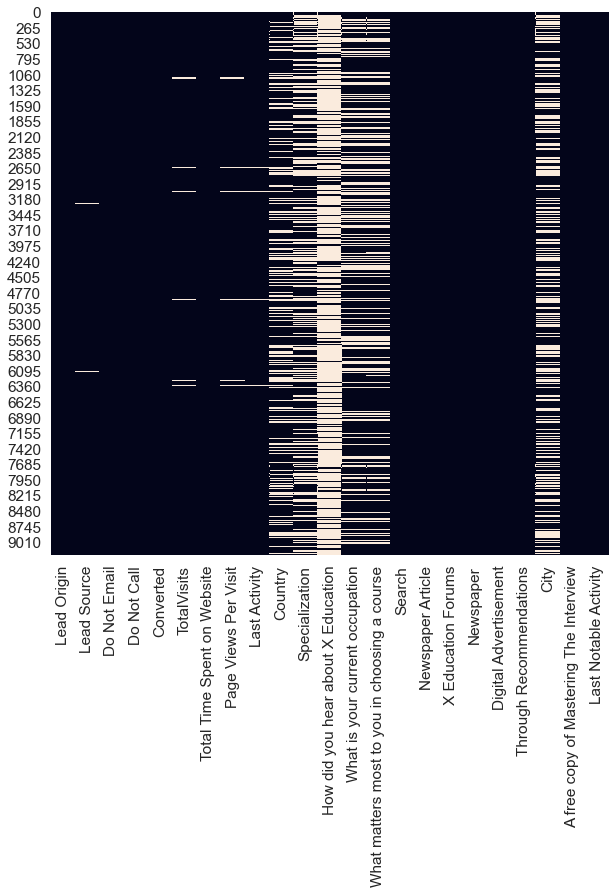

In [20]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.4)
sns.heatmap(leads.isnull(), cbar = False)
#plt.tight_layout()
plt.show()

**4.8.4 Drop columns having more than 45% NA values**

In [21]:
leads = leads.drop(leads.loc[:, list(round(100*(leads.isnull().sum()/len(leads.index)), 2)> 45)].columns, 1)

**4.8.5 Features/Columns with percentage of null values after dropping values > 45%**

In [22]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending = False), columns = ['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]), 2).sort_values(ascending = False), columns = ['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
City                                            3669       39.71
Specialization                                  3380       36.58
What matters most to you in choosing a course   2709       29.32
What is your current occupation                 2690       29.11
Country                                         2461       26.63
TotalVisits                                      137        1.48
Page Views Per Visit                             137        1.48
Last Activity                                    103        1.11
Lead Source                                       36        0.39
X Education Forums                                 0        0.00
A free copy of Mastering The Interview             0        0.00
Through Recommendations                            0        0.00
Digital Advertisement                              0        0.00
Newspaper                                          0        0.00
Lead Origin                                        0        0.00
Newspaper Article                                  0        0.00
Search                                             0        0.00
Total Time Spent on Website                        0        0.00
Converted                                          0        0.00
Do Not Call                                        0        0.00
Do Not Email                                       0        0.00
Last Notable Activity                              0        0.00

**4.9 Handling the remaining null values with reference to the above output**

**City**

Descriptive Statistics for City:
----------------------------
count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object
*************************************
Value Counts 
----------------
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
*************************************
City Countplot
----------------


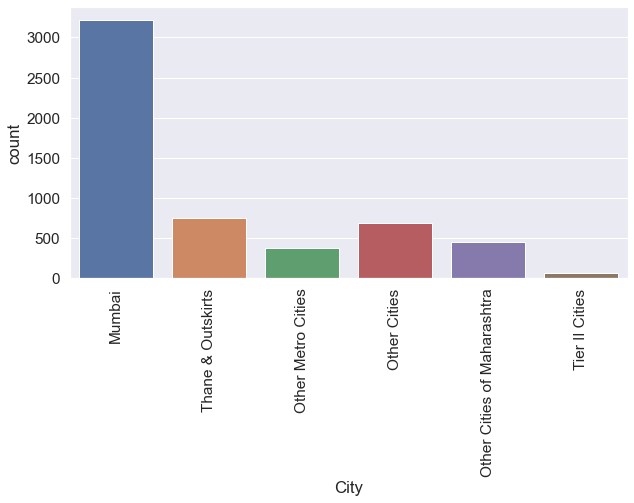

In [23]:
print('Descriptive Statistics for City:')
print('----------------------------')
print(leads['City'].describe())

print('*************************************')

print('Value Counts ')
print('----------------')
print(leads['City'].value_counts())
print('*************************************')

print('City Countplot')
print('----------------')
plt.figure(figsize = (10,5))
ax = sns.countplot(leads['City'])
plt.xticks(rotation = 90)
plt.show()

**`Inference:`**
- `More than 50% of the data available is Mumbai. So, we can impute Mumbai in the missing values.`

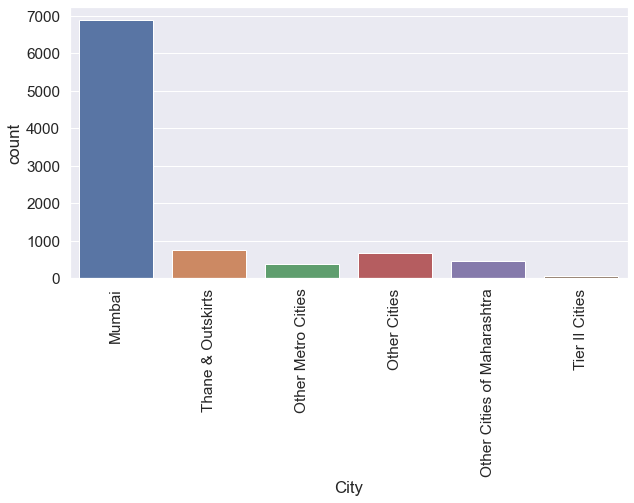

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


In [24]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

plt.figure(figsize = (10, 5))
ax = sns.countplot(leads['City'])
plt.xticks(rotation = 90)
plt.show()
print(leads['City'].value_counts())

**Specialization**

Descriptive Statistics for Specialization:
----------------------------------------
count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object
*************************************
Value Counts 
----------------
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            5

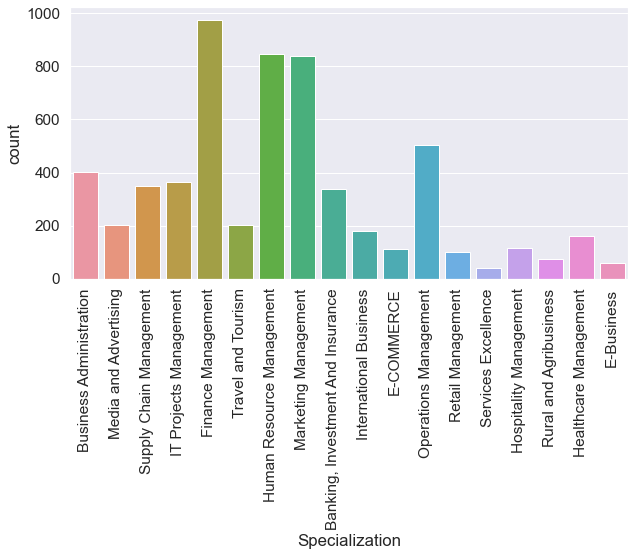

In [25]:
print('Descriptive Statistics for Specialization:')
print('----------------------------------------')
print(leads['Specialization'].describe())

print('*************************************')

print('Value Counts ')
print('----------------')
print(leads['Specialization'].value_counts())
print('*************************************')

print('Specialization Countplot')
print('----------------')
plt.figure(figsize = (10,5))
ax = sns.countplot(leads['Specialization'])
plt.xticks(rotation = 90)
plt.show()

**`Inference:`**
- `It maybe a case that leads had not entered any specialization if option is not available on the list, may not have any specialization or is a student. Hence, we can make a category others.`

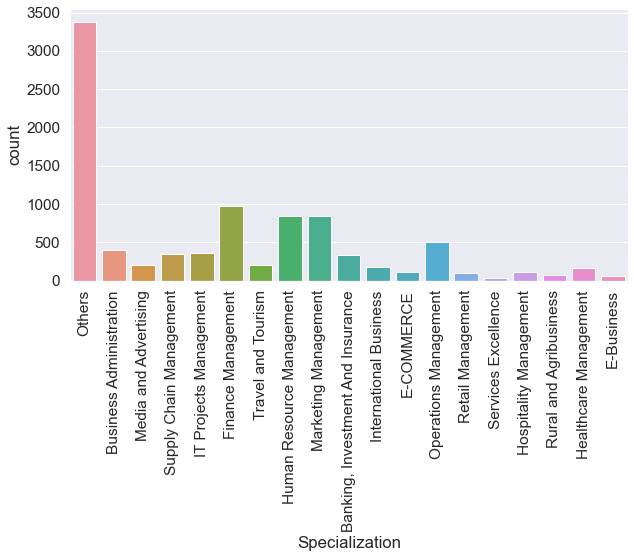

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [26]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

plt.figure(figsize = (10, 5))
ax = sns.countplot(leads['Specialization'])
plt.xticks(rotation = 90)
plt.show()
print(leads['Specialization'].value_counts())

**What matters most to you in choosing a course**

Descriptive Statistics for What matters most to you in choosing a course:
-------------------------------------------
count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object
*************************************
Value Counts 
----------------
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
*************************************
What matters most to you in choosing a course Countplot
----------------


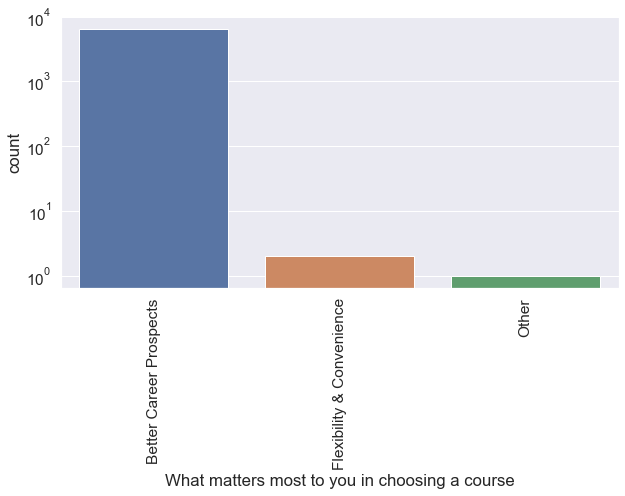

In [27]:
print('Descriptive Statistics for What matters most to you in choosing a course:')
print('-------------------------------------------')
print(leads['What matters most to you in choosing a course'].describe())

print('*************************************')

print('Value Counts ')
print('----------------')
print(leads['What matters most to you in choosing a course'].value_counts())
print('*************************************')

print('What matters most to you in choosing a course Countplot')
print('----------------')
plt.figure(figsize = (10,5))
ax = sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [28]:
leads = leads.drop(['What matters most to you in choosing a course'], axis = 1)
leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Others   
1             Email Opened   India                   Others   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Others   

  What is your current occupation Search Newspaper Article X Education Forums  \
0                      Unemployed     No                No                 No   
1                      Unemployed     No                No                 No   
2                         Student     No                No                 No   
3                      Unemployed     No                No                 No   
4                      Unemployed     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations    City  \
0        No                    No                      No  Mumbai   
1        No                    No                      No  Mumbai   
2        No                    No                      No  Mumbai   
3        No                    No                      No  Mumbai   
4        No                    No                      No  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

**`Inference:`**
- `Since the feature What matters most to you in choosing a course is highly skewed to Better Career Prospects we are dropping the feature.`

**What is your current occupation**

Descriptive Statistics for What is your current occupation:
-------------------------------------------
count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object
*************************************
Value Counts 
----------------
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
*************************************
What is your current occupation countplot
----------------


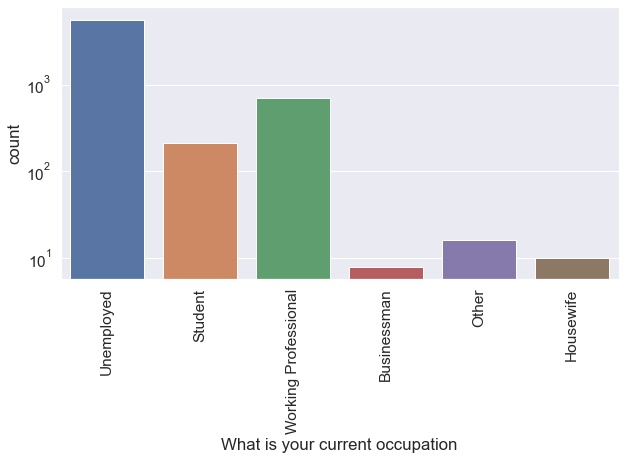

In [29]:
print('Descriptive Statistics for What is your current occupation:')
print('-------------------------------------------')
print(leads['What is your current occupation'].describe())

print('*************************************')

print('Value Counts ')
print('----------------')
print(leads['What is your current occupation'].value_counts())
print('*************************************')

print('What is your current occupation countplot')
print('----------------')
plt.figure(figsize = (10,5))
ax = sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

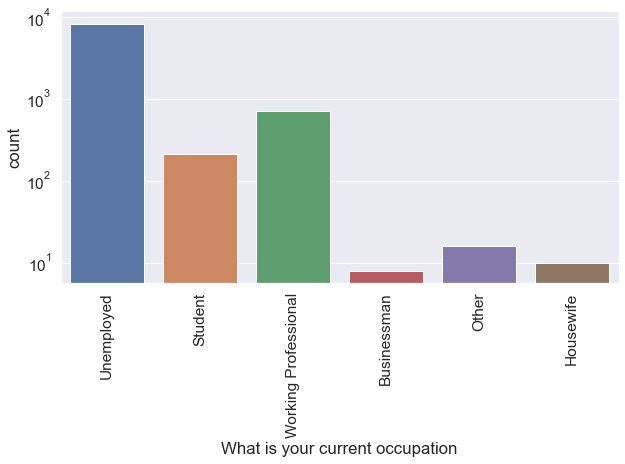

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [30]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

plt.figure(figsize = (10, 5))
ax = sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()
print(leads['What is your current occupation'].value_counts())

**Country**

Descriptive Statistics for Country:
-------------------------------------------
count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
*************************************
Value Counts 
----------------
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
South Africa               4
Canada                     4
Nigeria                    4
Kuwait                     4
Sweden                     3
Bangladesh                 2
Philippines                2
China                      2
Asia/Pacific Region        2
Uganda                     2
Ghana                      2
Netherlands                2
Belg

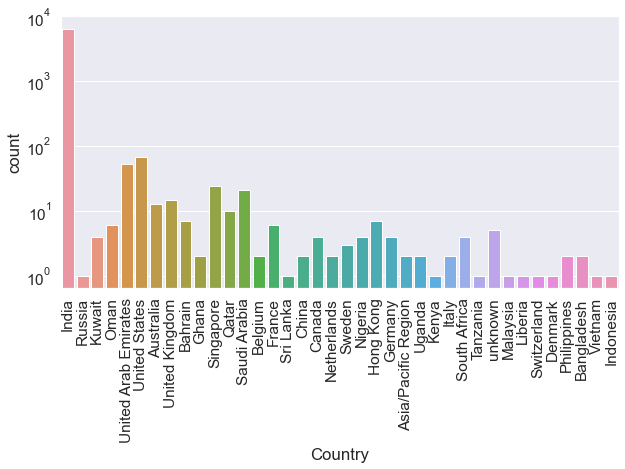

In [31]:
print('Descriptive Statistics for Country:')
print('-------------------------------------------')
print(leads['Country'].describe())

print('*************************************')

print('Value Counts ')
print('----------------')
print(leads['Country'].value_counts())
print('*************************************')

print('Country Countplot')
print('----------------')
plt.figure(figsize = (10,5))
ax = sns.countplot(leads['Country'])
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

**`Inference:`**
- `Country is India for most values so it is skewed towards India. Hence, we drop the same.`

In [32]:
leads = leads.drop(['Country'], axis = 1)

**4.10 Check percentage of columns again**

In [33]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending = False), columns = ['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]), 2).sort_values(ascending = False), columns = ['Percentage'])
pd.concat([total, percentage], axis =1)

Total  Percentage
TotalVisits                               137        1.48
Page Views Per Visit                      137        1.48
Last Activity                             103        1.11
Lead Source                                36        0.39
Lead Origin                                 0        0.00
Newspaper Article                           0        0.00
A free copy of Mastering The Interview      0        0.00
City                                        0        0.00
Through Recommendations                     0        0.00
Digital Advertisement                       0        0.00
Newspaper                                   0        0.00
X Education Forums                          0        0.00
What is your current occupation             0        0.00
Search                                      0        0.00
Specialization                              0        0.00
Total Time Spent on Website                 0        0.00
Converted                                   0        0.00
Do Not Call                                 0        0.00
Do Not Email                                0        0.00
Last Notable Activity                       0        0.00

**`Inference:`**
- `We have around 4 variables with very less null values. So, we can drop the null values simply.`

**4.11 Drop the remaining null values less than 1.5%**

In [34]:
leads.dropna(inplace = True)

**4.12 Check percentage of the columns again**

In [35]:
total = pd.DataFrame(leads.isnull().sum().sort_values(ascending = False), columns = ['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]), 2).sort_values(ascending = False), columns = ['Percentage'])
pd.concat([total, percentage], axis =1)

Total  Percentage
Lead Origin                                 0         0.0
Lead Source                                 0         0.0
A free copy of Mastering The Interview      0         0.0
City                                        0         0.0
Through Recommendations                     0         0.0
Digital Advertisement                       0         0.0
Newspaper                                   0         0.0
X Education Forums                          0         0.0
Newspaper Article                           0         0.0
Search                                      0         0.0
What is your current occupation             0         0.0
Specialization                              0         0.0
Last Activity                               0         0.0
Page Views Per Visit                        0         0.0
Total Time Spent on Website                 0         0.0
TotalVisits                                 0         0.0
Converted                                   0         0.0
Do Not Call                                 0         0.0
Do Not Email                                0         0.0
Last Notable Activity                       0         0.0

**`Inference:`**
- `Now, we have handled all the missing values in the DataFrame. Now, we will split the columns as categorical and numerical columns.`

**4.13 Divide the data into Numeric & Categorical data**

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#NUMERIC
numdata = leads[list(leads.select_dtypes(numerics).columns)]
#CATEGORICAL
catdata = leads[list(leads.select_dtypes(exclude = numerics).columns)]
print('*********************************************************')
print('---------------------------------------------------------')
print('Dividing the Features as Numerical and Categorical')
print('---------------------------------------------------------')

print('Categorical Columns')
print('---------------------------------------------------------')

print(catdata.columns)
print('---------------------------------------------------------')

print('Numerical Columns')
print('---------------------------------------------------------')

print(numdata.columns)
print('---------------------------------------------------------')
print('*********************************************************')

*********************************************************
---------------------------------------------------------
Dividing the Features as Numerical and Categorical
---------------------------------------------------------
Categorical Columns
---------------------------------------------------------
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
---------------------------------------------------------
Numerical Columns
---------------------------------------------------------
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
---------------------------------------------------------
***

**4.14 Data Retained for EDA**

In [37]:
Data_retained_EDA = len(leads)*100/len(leads_copy)
print('{} % of original rows is available for EDA'.format(round(Data_retained_EDA, 2)))

98.2 % of original rows is available for EDA


**4.15 Shape of Data after Data Cleaning**

In [38]:
leads.shape

(9074, 20)

## 5. Exploratory Data Analysis

## 5.1 Univariate Analysis - Categorical Column

In [39]:
catdata.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Count plotting for logarithmic scale

def uniplot(df, col, title, hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'magma')

In [41]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                    'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

#Let's keep considerable last activities as such and club all others to 'Other_Activity'
leads['Last Activity'] = leads['Last Activity'].replace(['Has a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow',
                                                        'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other_Activity')

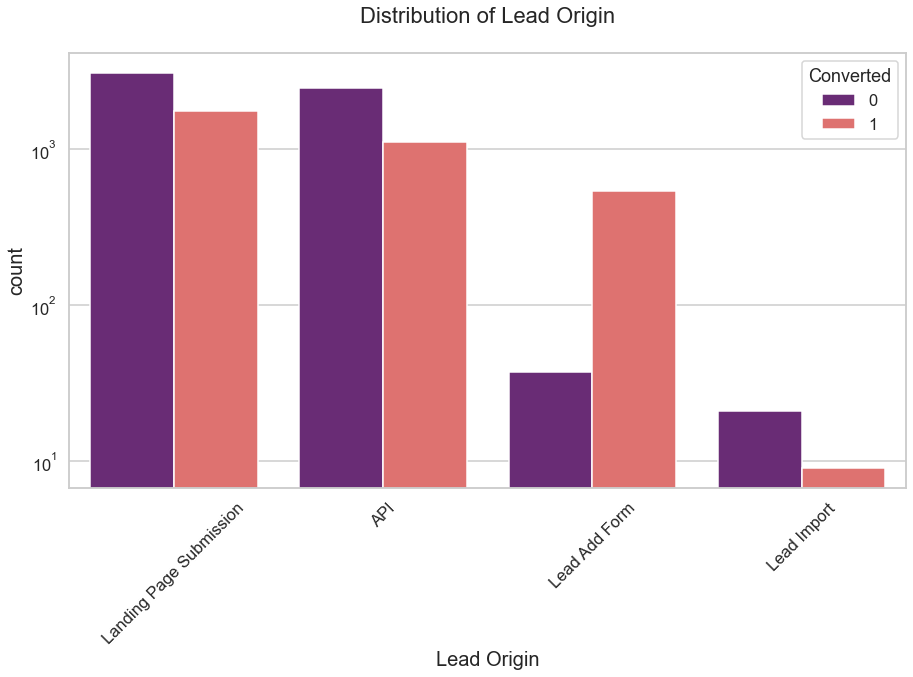

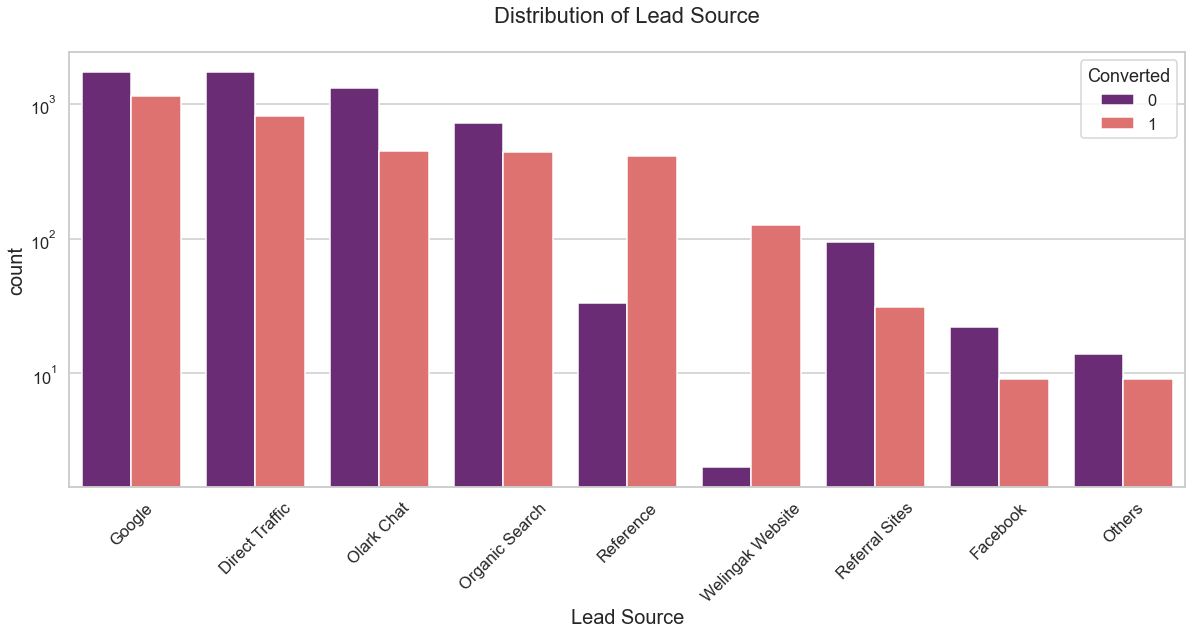

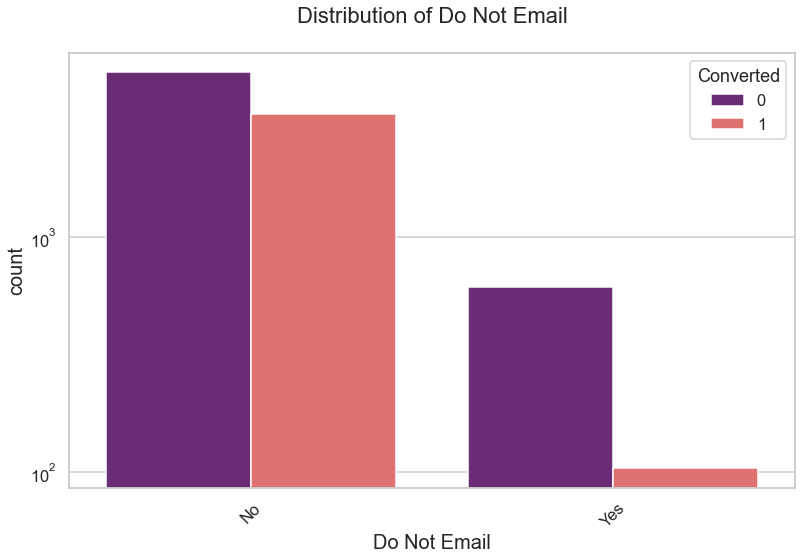

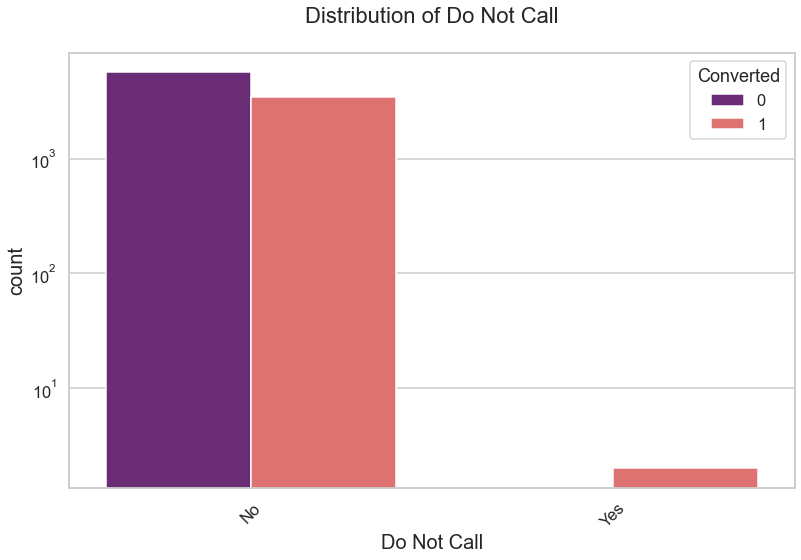

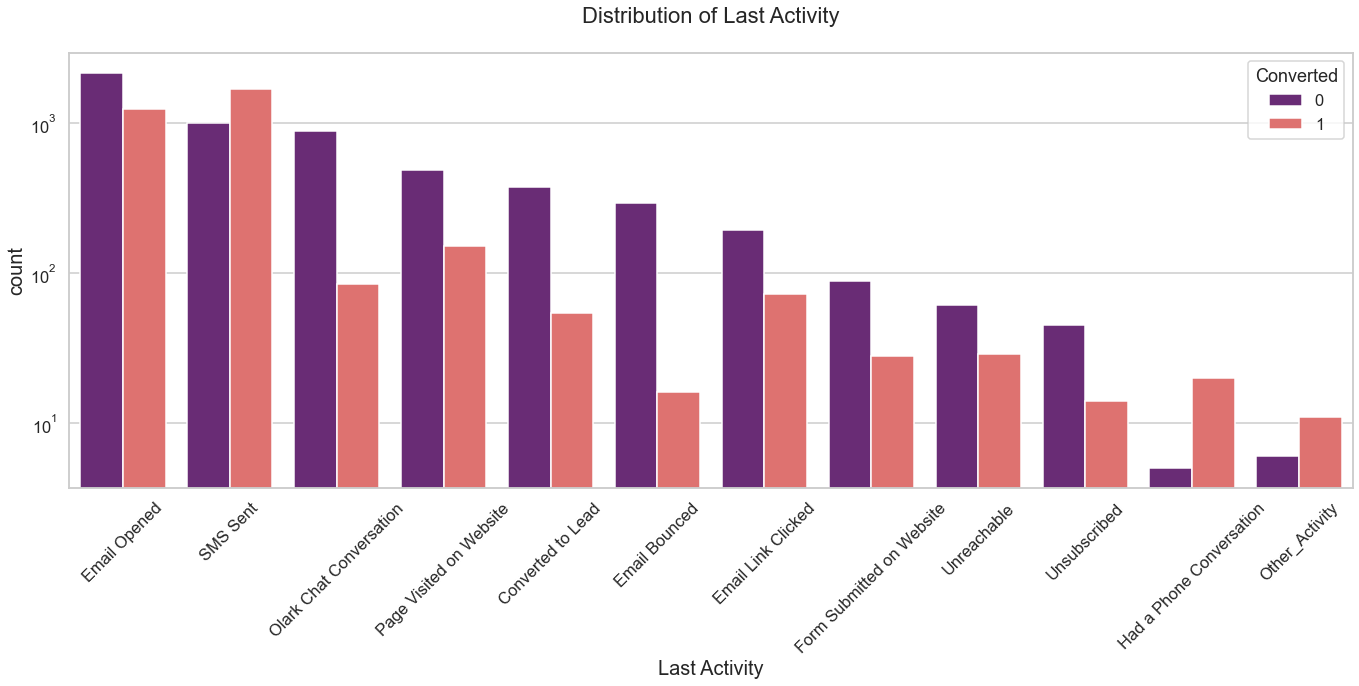

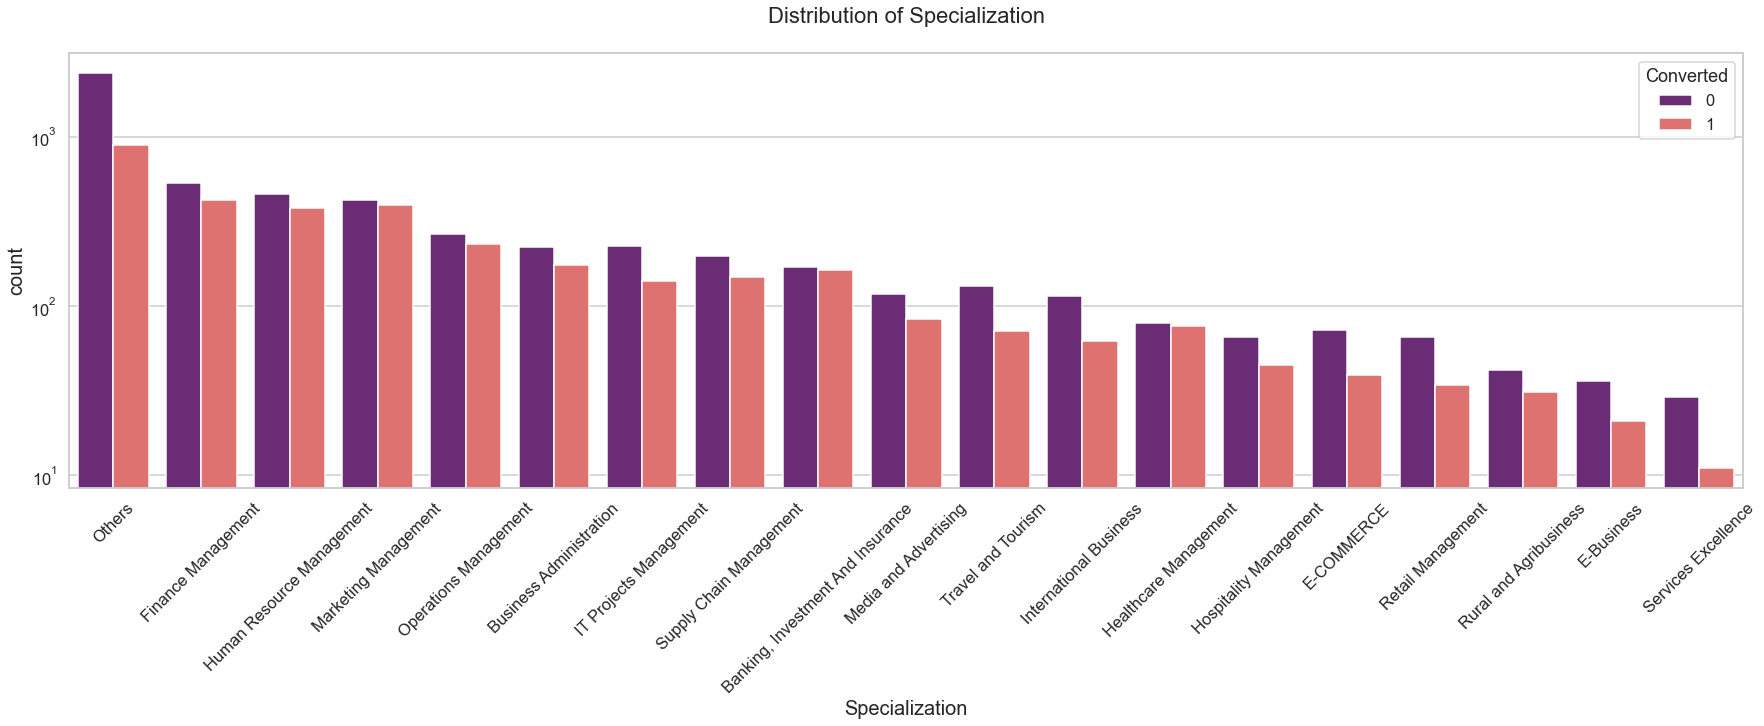

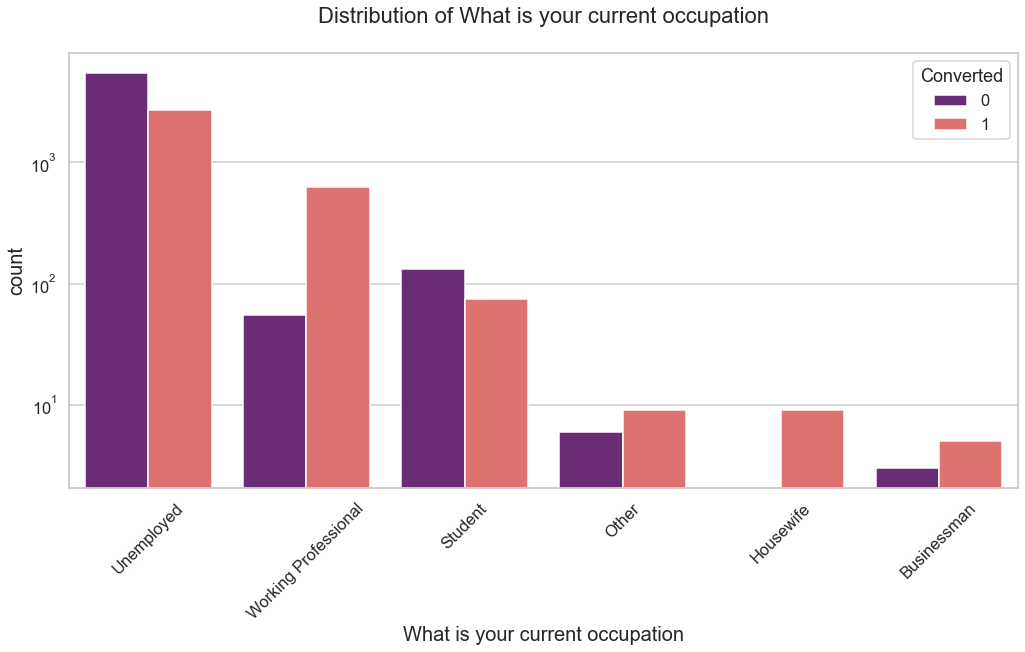

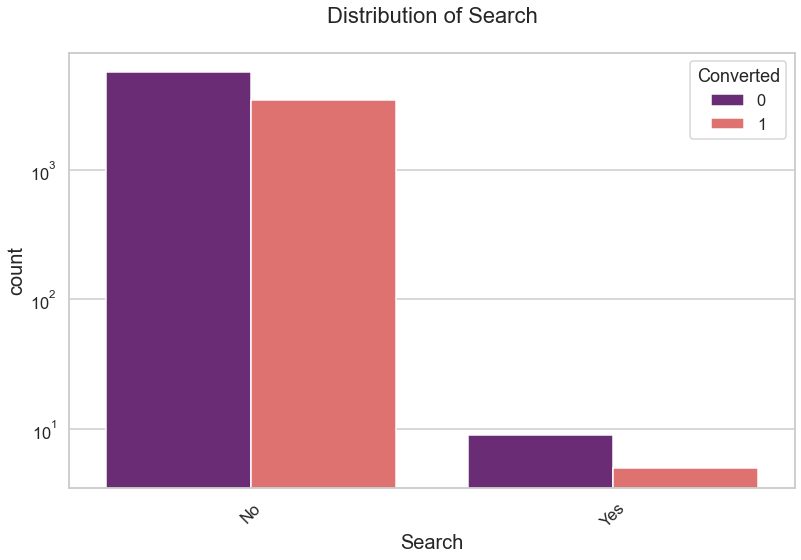

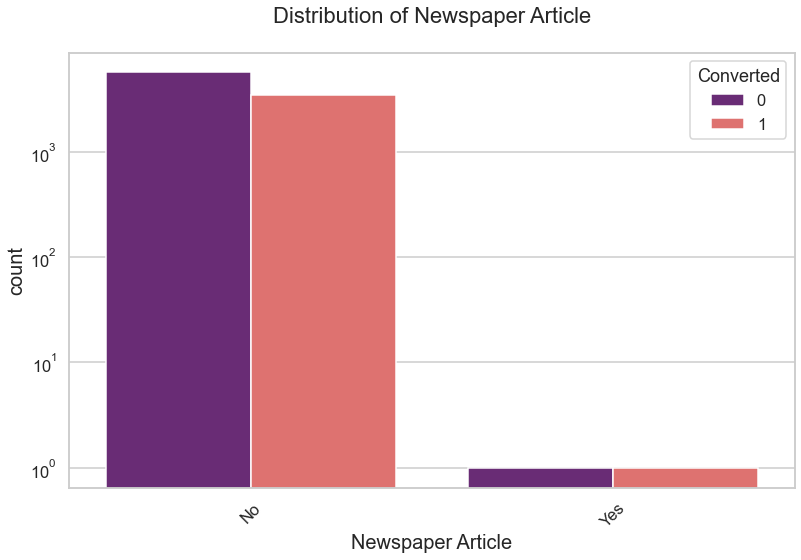

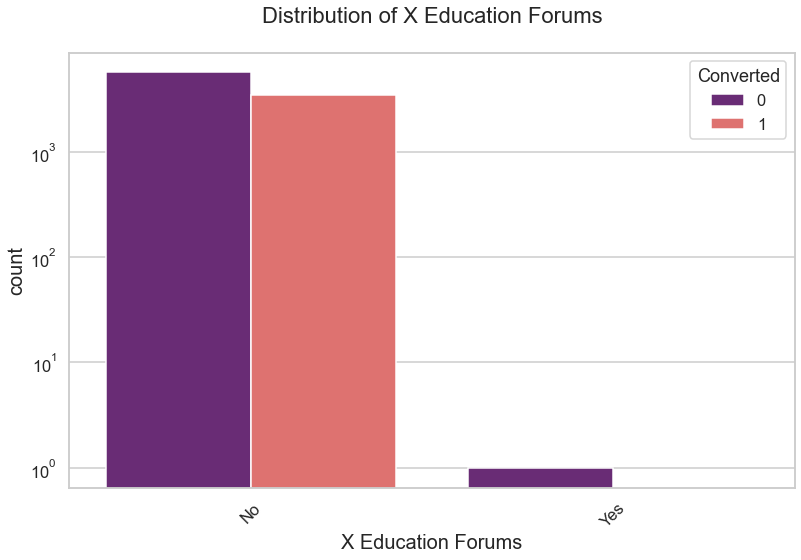

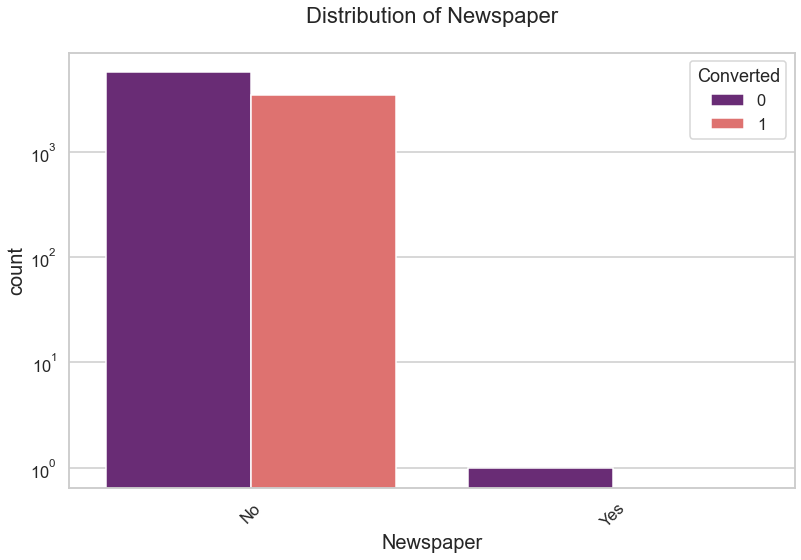

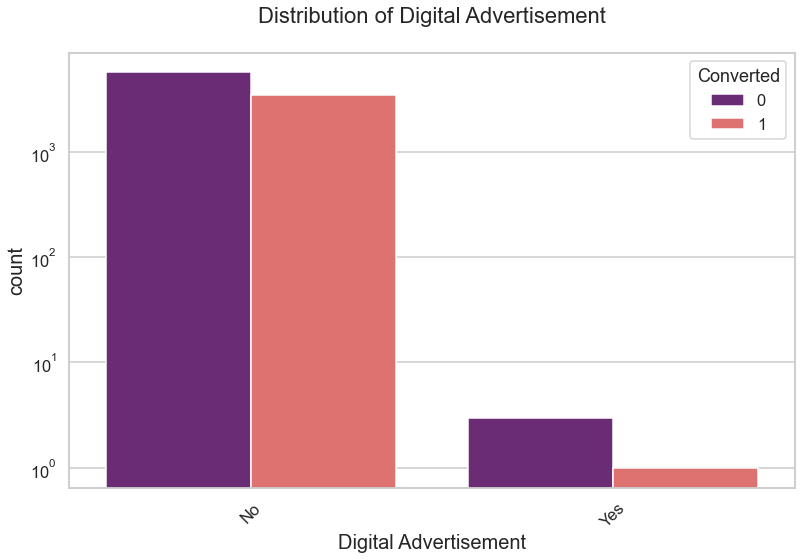

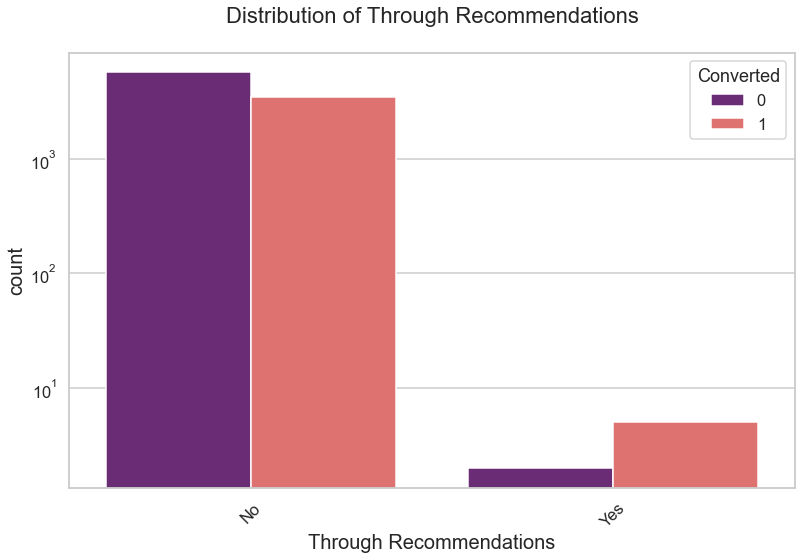

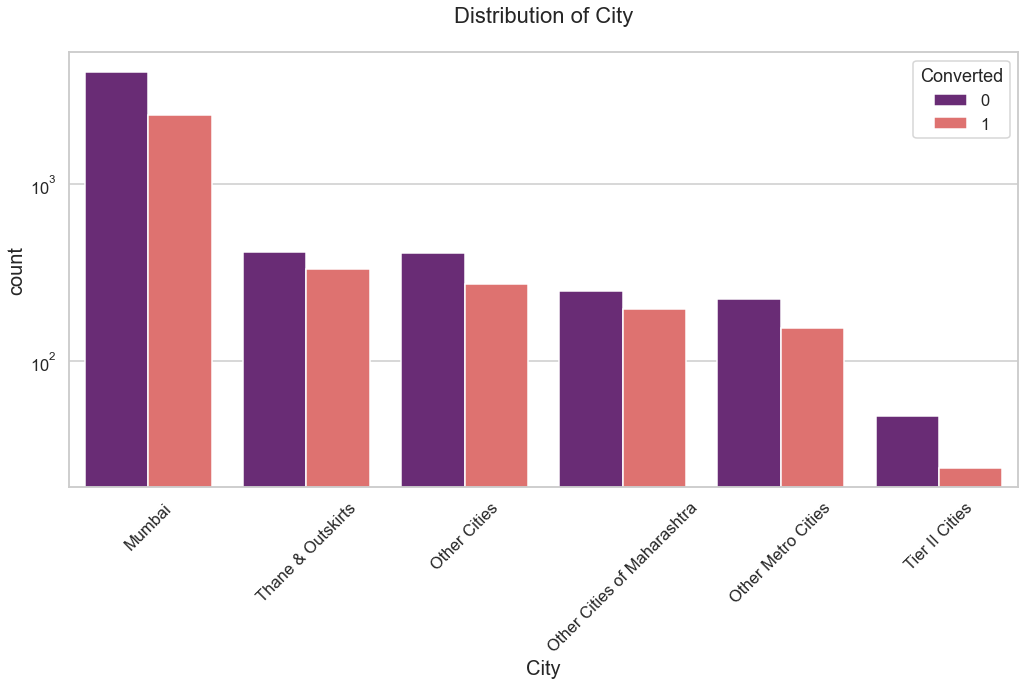

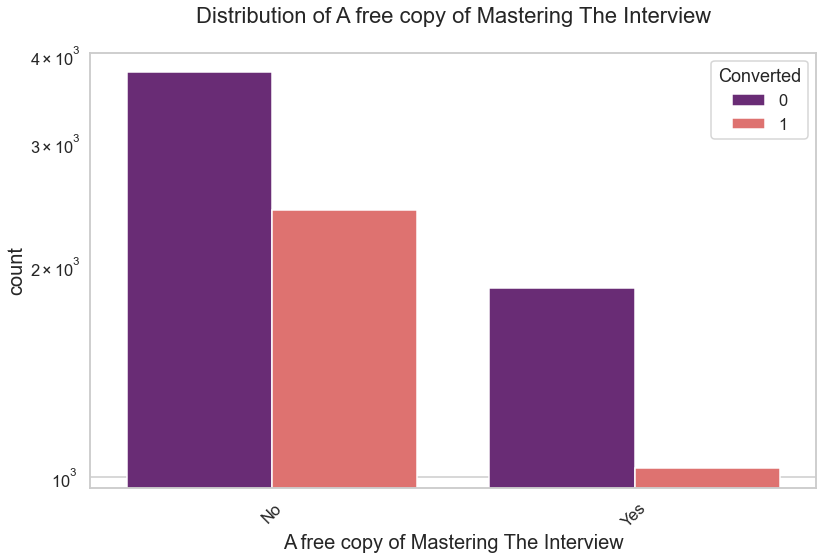

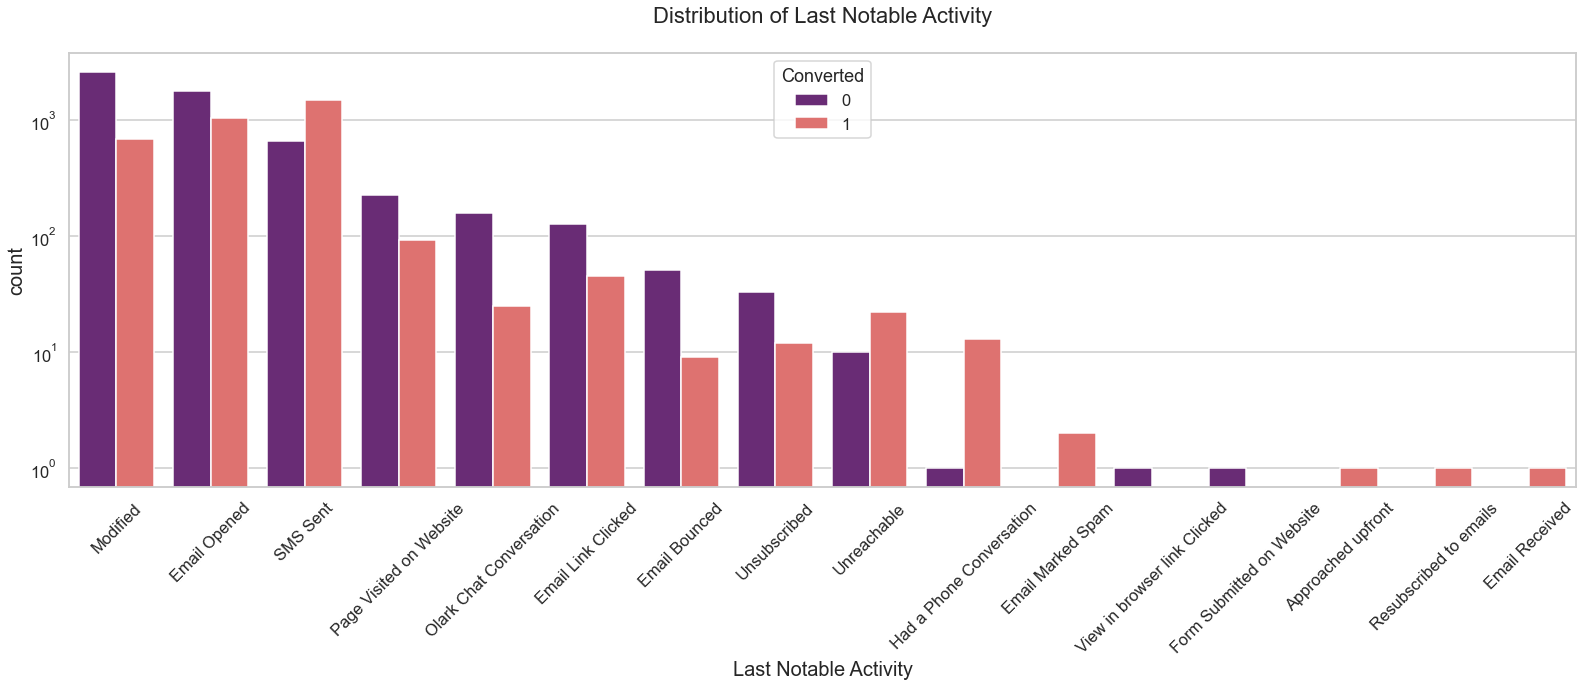

In [42]:
for columns in catdata:
    uniplot(leads, col = columns, title = 'Distribution of {0}'.format(columns), hue = 'Converted')

**`Inferences: Univariate Analysis Categorical Features`**

**`Distribution of Lead Origin:`**
- `Landing page submission is comparitively high than the rest of the categories in lead origin.`
- `lead import is the least category which is quantified in lead origin.`
- `Landing page submission and APO helps in lead conversion than the rest of the categories.`
- `Leads add form has high certainity in lead conversion #### Distribution of Lead Source.`
- `Google is the best lead source among all other categories in the lead source.`
- `Direct Traffic, Olark Chat and Organic Search are some of the best entities in lead source.`
- `The best category for lead conversion is Reference and Welingak Website.`
- `To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.`

**`Distribution of Do Not Email:`**
- `The cutomers who opted out of email communication is high.`
- `lead conversion through email has less certainity unlike other categories.`

**`Distribution of Do Not Call:`**
- `The customers who opted out of call communication is high.`
- `lead conversion through call has less certainity unlike other categories.`

**`Distribution of last Activity:`**
- `Most of the lead have their Email opened as their last activity.`
- `Conversion rate for leads with last activity as SMS Sent is almost 62%.`

**`Distribution of Specialization:`**
- `Focus should be more on the Specialization with high conversion rate like Supply Chain, Human Resource and Finance.`

**`Distribution of Occupation:`**
- `Working Professionals going for the course have high chances of joining it.`
    - `Unemployed leads are the most in numbers but has around 30-35% conversion rate.`

**`Distribution of Search:`**
- `Most entries are 'No'. No inference can be drawn with this parameter.`

**`Similar to Distribution of Search, No Inference can be drawn from the following features`**
- `'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'`

**`Distribution of City:`**
- `Most leads are from Mumbai with around 30% conversion rate.`

**`Distribution of Last notable Activity:`**
- `'SMS Sent' is strong entity for positive lead.`

**`Results from Univariate Analysis for Categorical Features:`**
- `Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis.`

In [43]:
leads = leads.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                    'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'], 1)

**5.1.1 Shape of Data after Univariate EDA - Categorical Columns**

In [44]:
print('Shape of Data after Univariate EDA - Categorical Columns has {0} rows and {1} columns'.format(leads.shape[0], leads.shape[1]))

Shape of Data after Univariate EDA - Categorical Columns has 9074 rows and 11 columns


**5.1.2 Basic information of Features after Univariate EDA - Categorical Columns**

In [45]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Converted                        9074 non-null   int64  
 3   TotalVisits                      9074 non-null   float64
 4   Total Time Spent on Website      9074 non-null   int64  
 5   Page Views Per Visit             9074 non-null   float64
 6   Last Activity                    9074 non-null   object 
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   City                             9074 non-null   object 
 10  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


## 5.2 Univariate Analysis - Numerical Columns

In [46]:
numdata.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

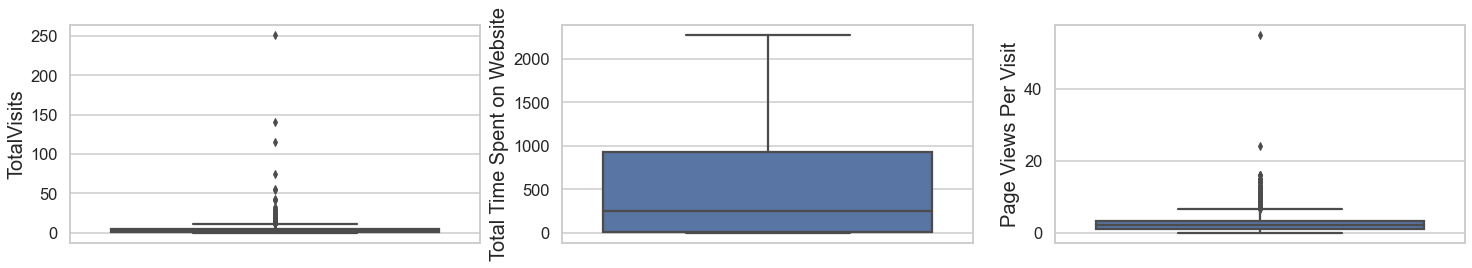

In [47]:
# Box plotting for univariate variables analysis in logarithmic scale
#Distribution for some of the numerical features.
plt.figure(figsize = (25, 4))
plt.subplot(1, 3, 1)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 8)
sns.boxplot(y = leads['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(y = leads['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(y = leads['Page Views Per Visit'])

plt.show()

`We can clearly spot outliers in the features such as TotalVisits and Page Views Per Visit. Total time spent on Website doesn't have any outliers. We can see that there are as many as 250 vivits recorded for total visits by possible leads. As high as this number of visits to a website seems to be not like a correct capture and hence we can remove these outliers. Similarly, for the Page Views Per Visit, as many as 20+ page views in a single visit seems to be not correct. We can remove these as well.`

**5.2.1 Outlier Treatment**

In [48]:
percentiles = leads['TotalVisits'].quantile([0.05, 0.95]).values
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

percentiles = leads['Total Time Spent on Website'].quantile([0.05, 0.95]).values
leads['Total Time Spent on Website'][leads['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

percentiles = leads['Page Views Per Visit'].quantile([0.05, 0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

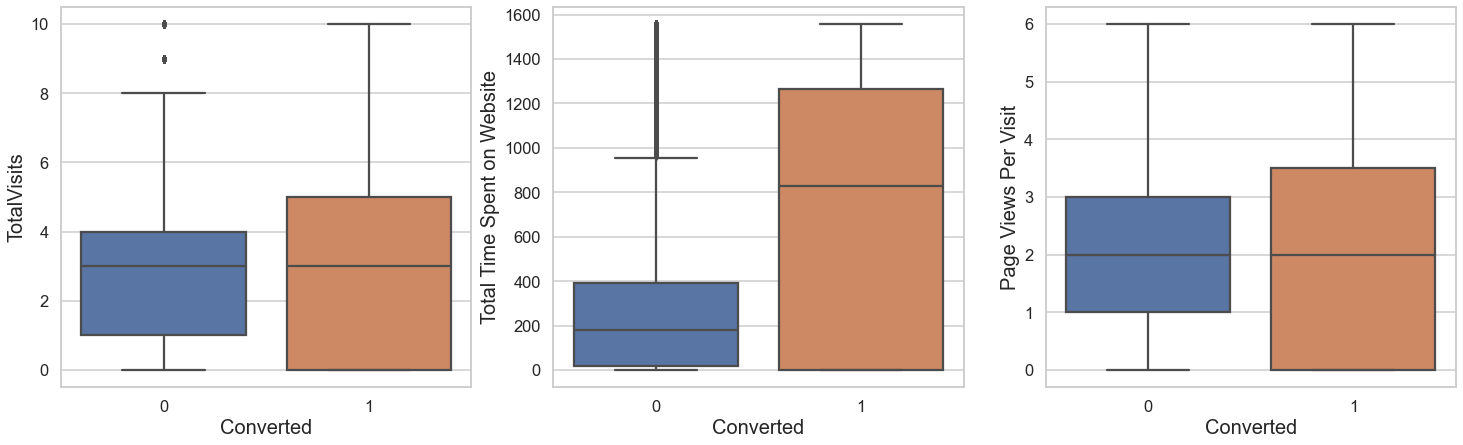

In [49]:
#Distribution for some of the numerical features after outliers treatment
plt.figure(figsize = (25, 7))

plt.subplot(1,3,1)
sns.boxplot(y = leads['TotalVisits'], x = leads['Converted'])

plt.subplot(1,3,2)
sns.boxplot(y = leads['Total Time Spent on Website'], x = leads['Converted'])

plt.subplot(1,3,3)
sns.boxplot(y = leads['Page Views Per Visit'], x = leads['Converted'])

plt.show()

**`Inferences:`**

**`Total Visits:`**
- `Median for converted and not converted leads are the same.`
- `Nothing conclusive on the basis of Total Visits.`

**`Total Time Spent on Website:`**
- `Leads spending more time on the website are more likely to be converted.`
- `Websites should be made more engaging to make leads spend more time.`

**`Page Views Per Visit:`**
- `Nothing can be said specifically for lead conversion from Page Views Per Visit.`

## 5.3 Bi-Variate Analysis

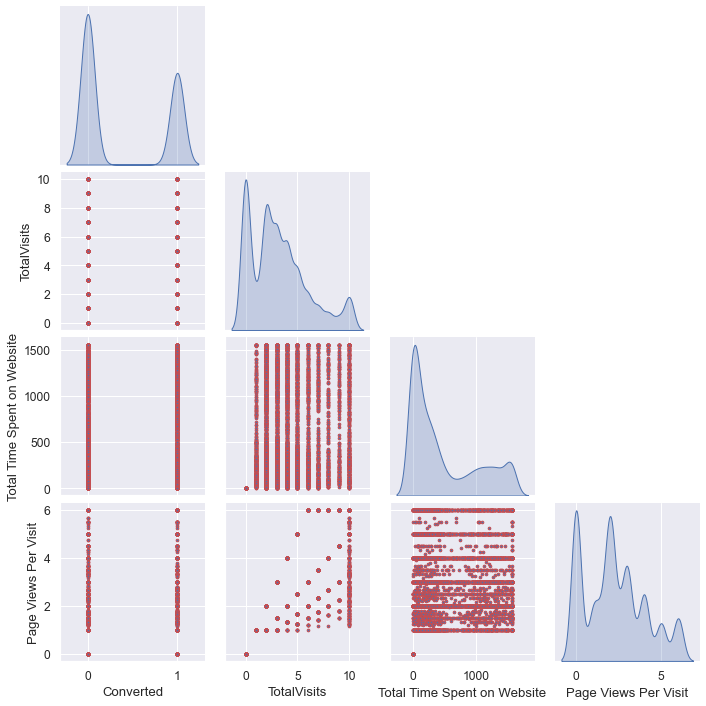

In [50]:
#plt.figure(figsize = (30, 50))
sns.set(font_scale = 1.1)
pair_plot = sns.pairplot(leads, diag_kind = 'kde', corner = True, plot_kws = dict(s = 7, edgecolor = 'r', linewidth = 1))
plt.show()

**`Inferences:`**
- `The data is skewed and we could witness a lot of noise in the data.`

**5.3.1 Correlation Plot to Check Multi-Collinearity**

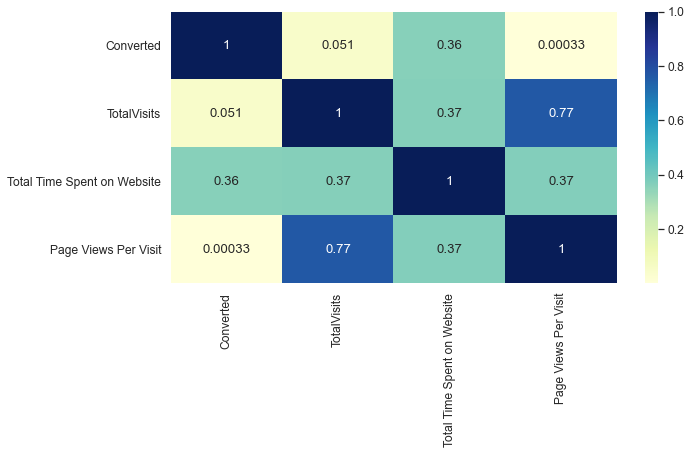

In [51]:
plt.figure(figsize = (10, 5))
sns.heatmap(leads.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

**`Inference:`**
- `Total Visits and Page Views Per Visit has high correlation than other features.`
- `Total Visits and Converted has very low correlation results which means that based on Total Visits we can derive meaningful lead scoring.`
- `Total Visits and Total Time Spent on Website have a reasonable correlation result.`
- `There is positive correlation between Total Time Spent on Website and Converted.`
- `There is almost no correlation in Page Views Per Visit and Total Visits with Converted.`

**5.3.2 Data Statistics after EDA**

In [52]:
print('Original Columns Retained: {}%'.format(round((100*len(leads.columns)/len(leads_copy.columns)), 2)))
print('Original Rows Retained: {}%'.format(round((len(leads)*100)/len(leads_copy), 2)))
print('Original Data Retained: {}%'.format(round((len(leads)*len(leads.columns))*100/(len(leads_copy.columns)*len(leads_copy)), 2)))
print('The Shape of Data after EDA has {0} rows and {1} columns'.format(leads.shape[0], leads.shape[1]))

Original Columns Retained: 29.73%
Original Rows Retained: 98.2%
Original Data Retained: 29.2%
The Shape of Data after EDA has 9074 rows and 11 columns


## 6. Data Preparation

**6.1 Check for Sample Data from the DataFrame**

In [53]:
leads.head(10)

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   
5                      API      Olark Chat          0          0.0   
6  Landing Page Submission          Google          1          2.0   
7                      API      Olark Chat          0          0.0   
8  Landing Page Submission  Direct Traffic          0          2.0   
9                      API          Google          0          4.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   
5                            0                   0.0  Olark Chat Conversation   
6                         1557                   2.0             Email Opened   
7                            0                   0.0  Olark Chat Conversation   
8                           71                   2.0             Email Opened   
9                           58                   4.0             Email Opened   

            Specialization What is your current occupation               City  \
0                   Others                      Unemployed             Mumbai   
1                   Others                      Unemployed             Mumbai   
2  Business Administration                         Student             Mumbai   
3    Media and Advertising                      Unemployed             Mumbai   
4                   Others                      Unemployed             Mumbai   
5                   Others                      Unemployed             Mumbai   
6  Supply Chain Management                      Unemployed             Mumbai   
7                   Others                      Unemployed             Mumbai   
8   IT Projects Management                      Unemployed  Thane & Outskirts   
9       Finance Management                      Unemployed             Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  
5              Modified  
6              Modified  
7              Modified  
8          Email Opened  
9          Email Opened

**6.2 Create a list of categorical variables with more than 2 categories for dummy variable creation**

In [54]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#NUMERIC
num_data = leads[list(leads.select_dtypes(numerics).columns)]
#CATEGORICAL
cat_data = leads[list(leads.select_dtypes(exclude = numerics).columns)]
print('*********************************************************')
print('---------------------------------------------------------')
print('Dividing the Features as Numerical and Categorical')
print('---------------------------------------------------------')

print('Categorical Columns')
print('---------------------------------------------------------')

print(cat_data.columns)
print('---------------------------------------------------------')

print('Numerical Columns')
print('---------------------------------------------------------')

print(num_data.columns)
print('---------------------------------------------------------')
print('*********************************************************')

*********************************************************
---------------------------------------------------------
Dividing the Features as Numerical and Categorical
---------------------------------------------------------
Categorical Columns
---------------------------------------------------------
Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')
---------------------------------------------------------
Numerical Columns
---------------------------------------------------------
Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
---------------------------------------------------------
*********************************************************


In [55]:
list_cat_var = []
for column in cat_data:
    _ = leads[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print('{:<30} = {}'.format(column, _))

Lead Origin                    = 4
Lead Source                    = 9
Last Activity                  = 12
Specialization                 = 19
What is your current occupation = 6
City                           = 6
Last Notable Activity          = 16


**6.3 Checking for count of categories in categorical variable**

In [56]:
#Creating the function to count of values as per category in column
def column_category_counts(data):
    return pd.DataFrame(data.value_counts(dropna = False))

for column in cat_data:
    print('Column Name: ', column)
    display(column_category_counts(leads[column]).T)

Column Name:  Lead Origin


Landing Page Submission   API  Lead Add Form  Lead Import
Lead Origin                     4885  3578            581           30

Column Name:  Lead Source


Google  Direct Traffic  Olark Chat  Organic Search  Reference  \
Lead Source    2873            2543        1753            1154        443   

             Welingak Website  Referral Sites  Facebook  Others  
Lead Source               129             125        31      23

Column Name:  Last Activity


Email Opened  SMS Sent  Olark Chat Conversation  \
Last Activity          3432      2716                      972   

               Page Visited on Website  Converted to Lead  Email Bounced  \
Last Activity                      640                428            312   

               Email Link Clicked  Form Submitted on Website  Unreachable  \
Last Activity                 267                        116           90   

               Unsubscribed  Had a Phone Conversation  Other_Activity  
Last Activity            59                        25              17

Column Name:  Specialization


Others  Finance Management  Human Resource Management  \
Specialization    3282                 959                        837   

                Marketing Management  Operations Management  \
Specialization                   823                    499   

                Business Administration  IT Projects Management  \
Specialization                      399                     366   

                Supply Chain Management  Banking, Investment And Insurance  \
Specialization                      346                                335   

                Media and Advertising  Travel and Tourism  \
Specialization                    202                 202   

                International Business  Healthcare Management  \
Specialization                     176                    156   

                Hospitality Management  E-COMMERCE  Retail Management  \
Specialization                     111         111                100   

                Rural and Agribusiness  E-Business  Services Excellence  
Specialization                      73          57                   40

Column Name:  What is your current occupation


Unemployed  Working Professional  Student  \
What is your current occupation        8159                   677      206   

                                 Other  Housewife  Businessman  
What is your current occupation     15          9            8

Column Name:  City


Mumbai  Thane & Outskirts  Other Cities  Other Cities of Maharashtra  \
City    6752                745           680                          446   

      Other Metro Cities  Tier II Cities  
City                 377              74

Column Name:  Last Notable Activity


Modified  Email Opened  SMS Sent  \
Last Notable Activity      3267          2823      2152   

                       Page Visited on Website  Olark Chat Conversation  \
Last Notable Activity                      318                      183   

                       Email Link Clicked  Email Bounced  Unsubscribed  \
Last Notable Activity                 173             60            45   

                       Unreachable  Had a Phone Conversation  \
Last Notable Activity           32                        14   

                       Email Marked Spam  View in browser link Clicked  \
Last Notable Activity                  2                             1   

                       Form Submitted on Website  Approached upfront  \
Last Notable Activity                          1                   1   

                       Resubscribed to emails  Email Received  
Last Notable Activity                       1               1

**6.4 Values under 'Last Activity' are covered as values under 'Last Notable Activity'. Either of one can be dropped.**

In [57]:
leads.drop(['Last Notable Activity'], 1, inplace = True)

**6.5 Creating Master DataFrame with Dummy Variables**

In [58]:
cat_data = leads[list(leads.select_dtypes(exclude = numerics).columns)]
list_cat_var = []
for column in cat_data:
    _ = leads[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print('{:<30} = {}'.format(column, _))

master_leads = pd.get_dummies(leads, columns = list_cat_var, drop_first = True)

Lead Origin                    = 4
Lead Source                    = 9
Last Activity                  = 12
Specialization                 = 19
What is your current occupation = 6
City                           = 6


In [59]:
master_leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                        

In [60]:
print('The Shape of Data after creating Dummies has {0} rows and {1} columns'.format(master_leads.shape[0], master_leads.shape[1]))

The Shape of Data after creating Dummies has 9074 rows and 54 columns


In [61]:
master_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 6   Lead Origin_Lead Import                               9074 non-null   uint8  
 7   Lead Source_Facebook                                  9074 non-null   uint8  
 8   Lead Source_Google                                    9074

**6.6 Correlation Matrix to see Multi-Collinearity in the Master DataFrame**

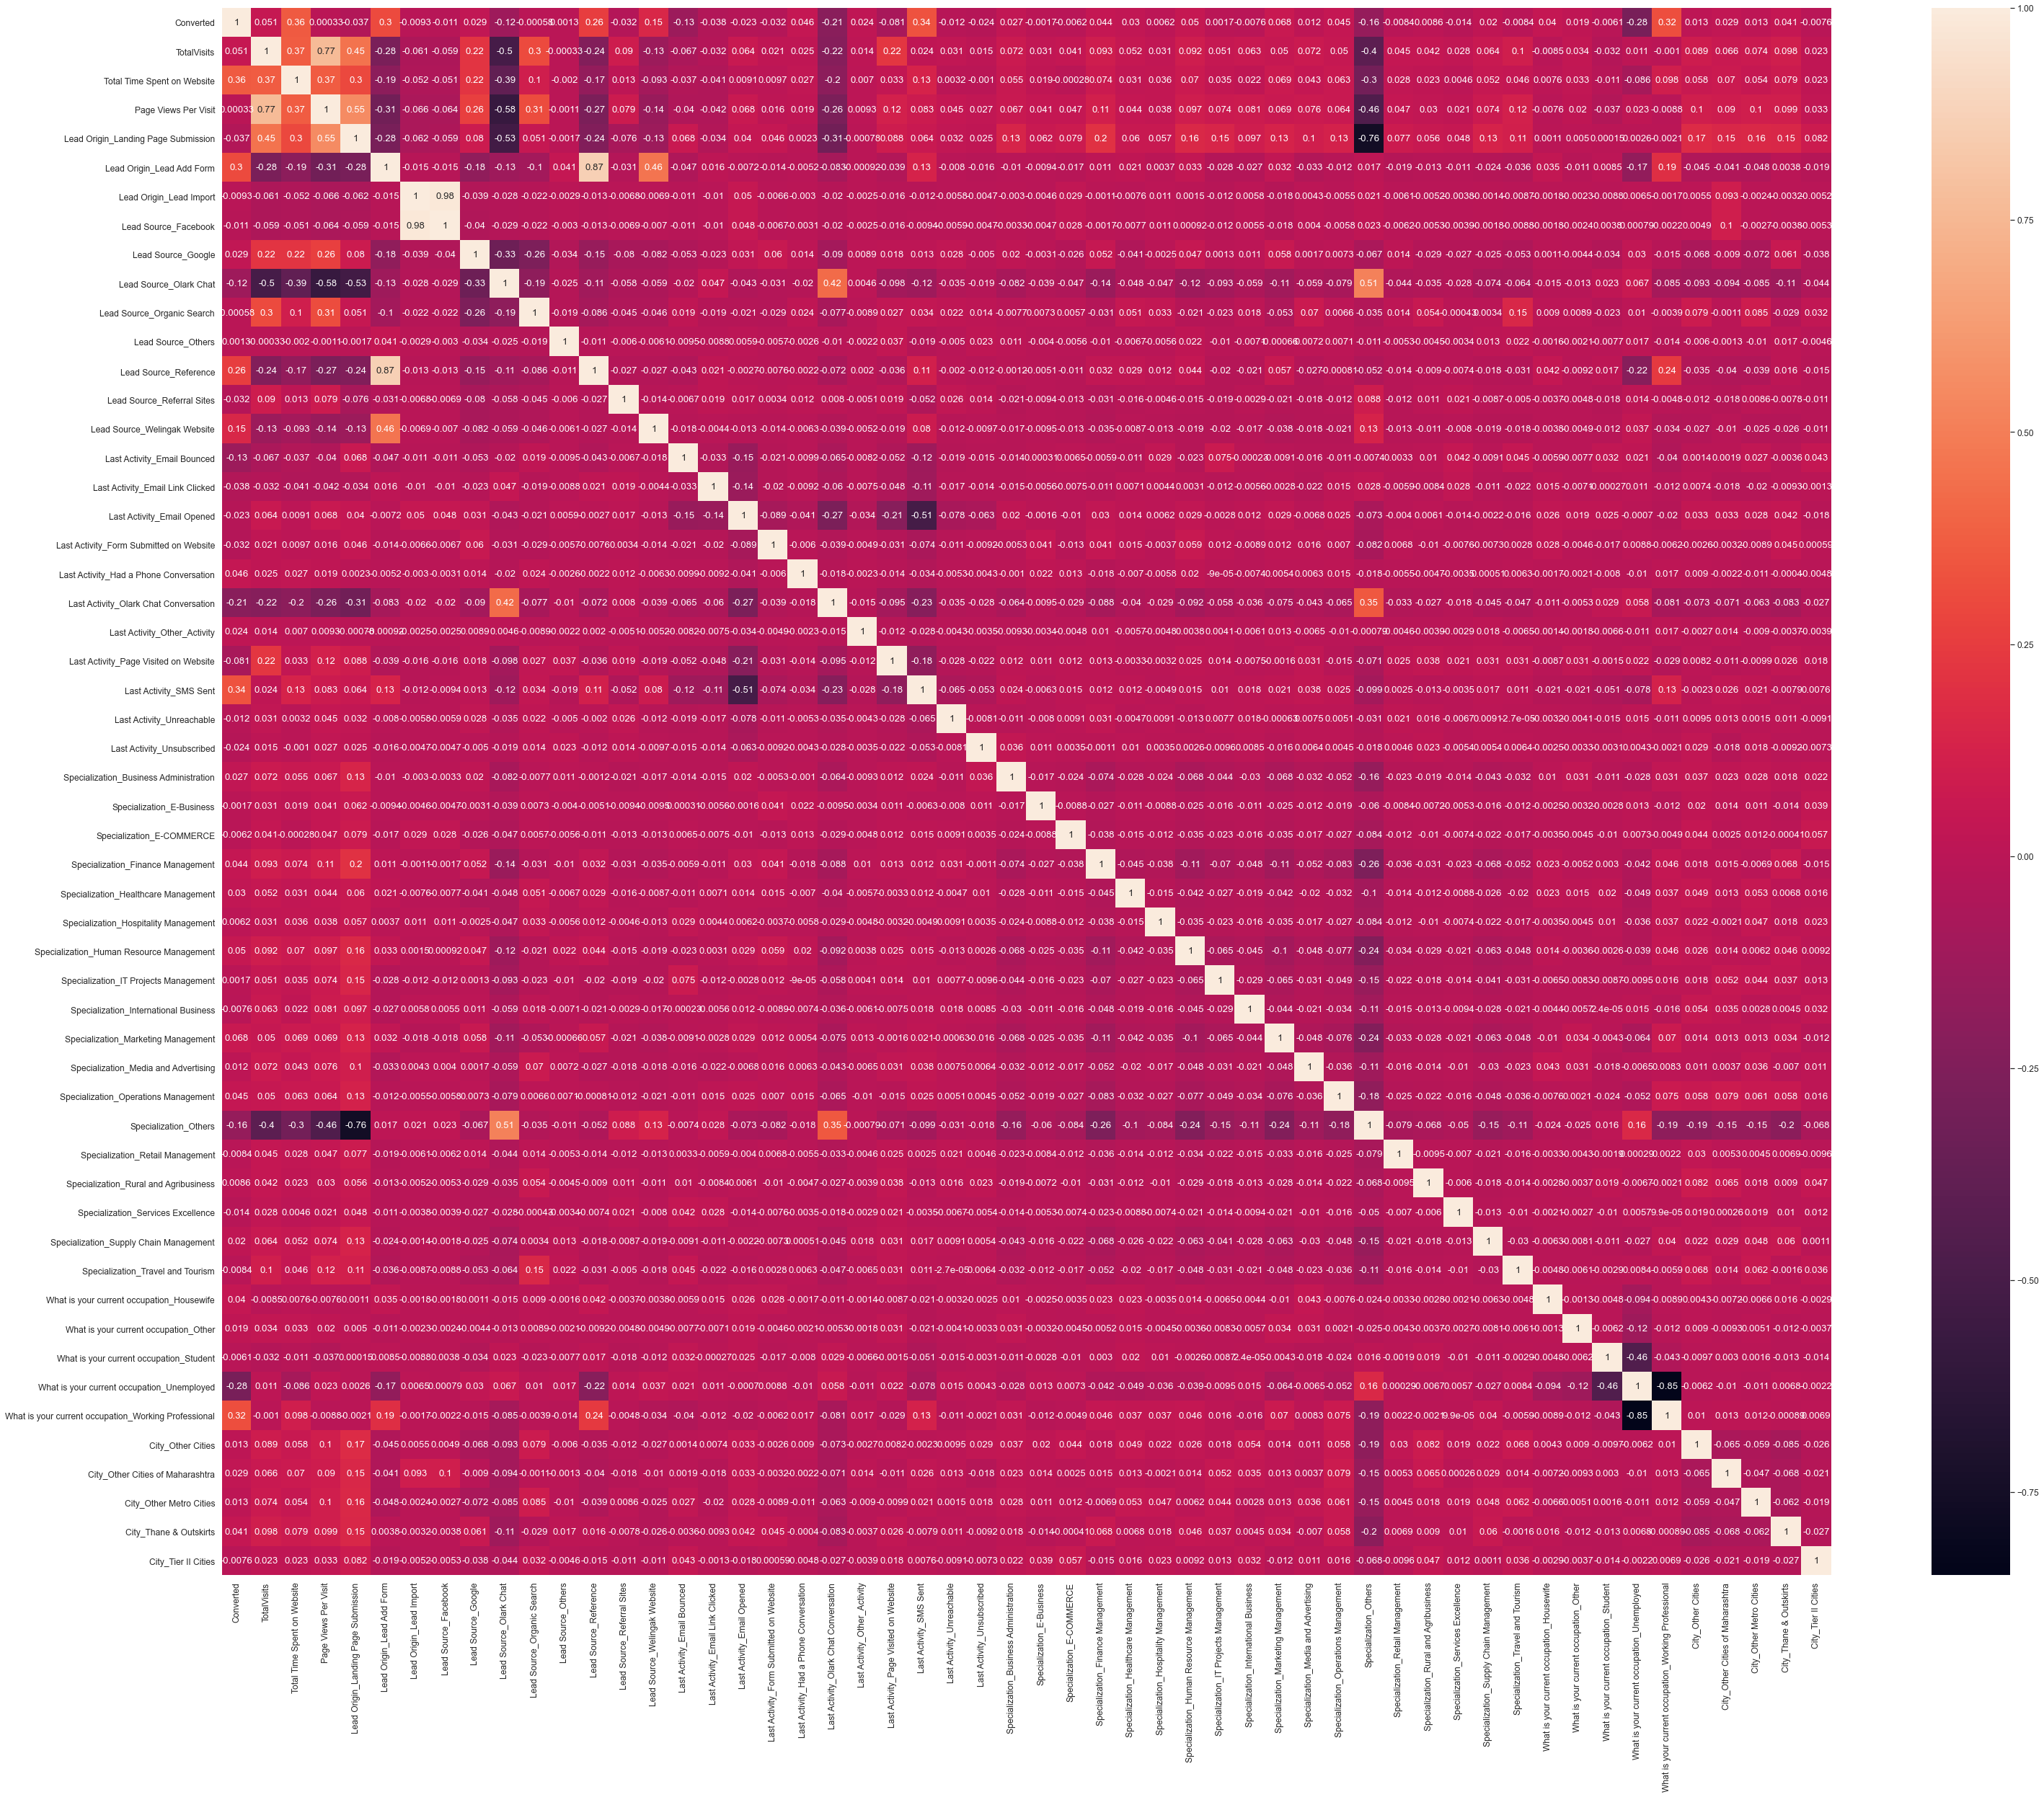

In [62]:
plt.figure(figsize = (50, 40))
sns.heatmap(master_leads.corr(), annot = True)
plt.show()

**6.7 To check for high correlation we find variables with correlation greater than 0.5**

In [63]:
c_index = []
c_columns = []
c_value = []
for row in master_leads.columns:
    for column in master_leads.columns:
        if row != column:
            _ = master_leads[row].corr(master_leads[column])
            if _ > 0.5:
                
                if row < column:
                    c_index.append(row)
                    c_columns.append(column)
                    c_value.append(_)
                    
                else: 
                    c_index.append(column)
                    c_columns.append(row)
                    c_value.append(_)

In [64]:
correlation_mat = pd.DataFrame([c_index, c_columns, c_value]).T.rename(columns = {0: 'Variable 1', 1: 'Variable 2', 3: 'Coefficient'})
correlation_mat = correlation_mat[correlation_mat.duplicated(subset = ['Variable 1'])]
correlation_mat

Variable 1             Variable 2         2
1                 Page Views Per Visit            TotalVisits  0.766567
3  Lead Origin_Landing Page Submission   Page Views Per Visit  0.554142
6              Lead Origin_Lead Import   Lead Source_Facebook  0.983684
8            Lead Origin_Lead Add Form  Lead Source_Reference  0.866191
9               Lead Source_Olark Chat  Specialization_Others  0.509466

## 7. Train Test Data Split

In [65]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#NUMERIC
num_data_master_leads = master_leads[list(master_leads.select_dtypes(numerics).columns)]
#CATEGORICAL
cat_data_master_leads = master_leads[list(master_leads.select_dtypes(exclude = numerics).columns)]

print(cat_data_master_leads.columns)
print(num_data_master_leads.columns)

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Man

**7.1 Defining Y**

In [66]:
#Defining Y
Y = master_leads['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

**7.2 Defining X**

In [67]:
from sklearn.model_selection import train_test_split
X = master_leads.drop(['Converted'], axis = 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                      

In [68]:
#Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 333)

**7.3 Sample Data of X_train DataFrame**

In [69]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9190          4.0                          346                   4.0   
8604         10.0                          165                   5.0   
2916          4.0                          639                   4.0   
189           6.0                          385                   6.0   
3037          2.0                          450                   2.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
9190                                    1                          0   
8604                                    1                          0   
2916                                    1                          0   
189                                     0                          0   
3037                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
9190                        0                     0                   1   
8604                        0                     0                   1   
2916                        0                     0                   0   
189                         0                     0                   0   
3037                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
9190                       0                           0                   0   
8604                       0                           0                   0   
2916                       0                           1                   0   
189                        0                           1                   0   
3037                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
9190                      0                           0   
8604                      0                           0   
2916                      0                           0   
189                       0                           0   
3037                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
9190                             0                            0   
8604                             0                            0   
2916                             0                            0   
189                              0                            0   
3037                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
9190                                 0                           0   
8604                                 0                           0   
2916                                 0                           0   
189                                  0                           0   
3037                                 0                           0   

      Last Activity_Form Submitted on Website  \
9190                                        0   
8604                                        0   
2916                                        0   
189                                         0   
3037                                        0   

      Last Activity_Had a Phone Conversation  \
9190                                       0   
8604                                       0   
2916                                       0   
189                                        0   
3037                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
9190                                      0                             0   
8604                                      0                             0   
2916                                      0                             0   
189                                       0                             0   
3037                                      0                 

In [70]:
print('The Shape of Data from X_train has {0} rows and {1} columns'.format(X_train.shape[0], X_train.shape[1]))

The Shape of Data from X_train has 7259 rows and 53 columns


**7.4 Sample Data of X_test DataFrame**

In [71]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1461          5.0                           71                  5.00   
7926          4.0                          233                  1.33   
1909          5.0                          431                  2.50   
8971          4.0                         1557                  4.00   
5310          4.0                          101                  4.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1461                                    0                          0   
7926                                    0                          0   
1909                                    1                          0   
8971                                    1                          0   
5310                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
1461                        0                     0                   1   
7926                        0                     0                   0   
1909                        0                     0                   1   
8971                        0                     0                   0   
5310                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1461                       0                           0                   0   
7926                       0                           0                   0   
1909                       0                           0                   0   
8971                       0                           0                   0   
5310                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1461                      0                           0   
7926                      0                           0   
1909                      0                           0   
8971                      0                           0   
5310                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1461                             0                            0   
7926                             0                            0   
1909                             0                            0   
8971                             0                            0   
5310                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1461                                 0                           0   
7926                                 0                           0   
1909                                 0                           1   
8971                                 0                           1   
5310                                 0                           0   

      Last Activity_Form Submitted on Website  \
1461                                        0   
7926                                        0   
1909                                        0   
8971                                        0   
5310                                        0   

      Last Activity_Had a Phone Conversation  \
1461                                       0   
7926                                       0   
1909                                       0   
8971                                       0   
5310                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
1461                                      1                             0   
7926                                      1                             0   
1909                                      0                             0   
8971                                      0                             0   
5310                                      0                 

In [72]:
print('The Shape of Data from X_test has {0} rows and {1} columns'.format(X_test.shape[0], X_test.shape[1]))

The Shape of Data from X_test has 1815 rows and 53 columns


**7.5 Sample Data of Y_train DataFrame**

In [73]:
Y_train.head()

9190    0
8604    0
2916    0
189     1
3037    0
Name: Converted, dtype: int64

In [74]:
Y_train.shape

(7259,)

**7.6 Sample Data of Y_test DataFrame**

In [75]:
Y_test.head()

1461    0
7926    0
1909    0
8971    1
5310    0
Name: Converted, dtype: int64

In [76]:
Y_test.shape

(1815,)

**7.7 Feature Scaling**

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9190     0.300780                    -0.248789              0.976193   
8604     2.467531                    -0.592599              1.534715   
2916     0.300780                     0.307766              0.976193   
189      1.023031                    -0.174708              2.093237   
3037    -0.421470                    -0.051241             -0.140852   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
9190                                    1                          0   
8604                                    1                          0   
2916                                    1                          0   
189                                     0                          0   
3037                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
9190                        0                     0                   1   
8604                        0                     0                   1   
2916                        0                     0                   0   
189                         0                     0                   0   
3037                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
9190                       0                           0                   0   
8604                       0                           0                   0   
2916                       0                           1                   0   
189                        0                           1                   0   
3037                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
9190                      0                           0   
8604                      0                           0   
2916                      0                           0   
189                       0                           0   
3037                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
9190                             0                            0   
8604                             0                            0   
2916                             0                            0   
189                              0                            0   
3037                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
9190                                 0                           0   
8604                                 0                           0   
2916                                 0                           0   
189                                  0                           0   
3037                                 0                           0   

      Last Activity_Form Submitted on Website  \
9190                                        0   
8604                                        0   
2916                                        0   
189                                         0   
3037                                        0   

      Last Activity_Had a Phone Conversation  \
9190                                       0   
8604                                       0   
2916                                       0   
189                                        0   
3037                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
9190                                      0                             0   
8604                                      0                             0   
2916                                      0                             0   
189                                       0                             0   
3037                                      0                 

## 8. Model Building

**8.1 Logistics Regression Model 1**

In [78]:
import statsmodels.api as sm

In [79]:
#Logistic Regression Model
logm1 = sm.GLM(Y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7205
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.0
Date:                Wed, 13 Oct 2021   Deviance:                       5924.1
Time:                        17:23:30   Pearson chi2:                 7.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2748      1.096     -0.251      0.802      -2.424       1.874
TotalVisits                                              0.3531      0.052      6.853      0.000       0.252       0.454
Total Time Spent on Website                              1.1304      0.038     29.728      0.000       1.056       1.205
Page Views Per Visit                                    -0.3459      0.058     -5.984      0.000      -0.459      -0.233
Lead Origin_Landing Page Submission                     -0.9310      0.129     -7.207      0.000      -1.184      -0.678
Lead Origin_Lead Add Form                                1.7810      0.966      1.845      0.065      -0.111       3.674
Lead Origin_Lead Import                                 21.6497   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.0100   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3666      0.090      4.052      0.000       0.189       0.544
Lead Source_Olark Chat                                   1.4155      0.151      9.345      0.000       1.119       1.712
Lead Source_Organic Search                               0.2489      0.121      2.062      0.039       0.012       0.486
Lead Source_Others                                       0.5749      0.656      0.876      0.381      -0.711       1.861
Lead Source_Reference                                    1.8837      0.986      1.911      0.056      -0.048       3.816
Lead Source_Referral Sites                              -0.0867      0.328     -0.264      0.792      -0.730       0.557
Lead Source_Welingak Website                             5.1360      1.401      3.666      0.000       2.390       7.882
Last Activity_Email Bounced                             -0.9310      0.372     -2.503      0.012      -1.660      -0.202
Last Activity_Email Link Clicked                         0.7467      0.277      2.694      0.007       0.203       1.290
Last Activity_Email Opened                               1.0787      0.204      5.292      0.000       0.679       1.478
Last Activity_Form Submitted on Website                  0.4590      0.358      1.283      0.199      -0.242       1.160
Last Activity_Had a Phone Conversation                   2.9824      0.670      4.449      0.000       1.669       4.296
Last Activity_Olark Chat Conversation                   -0.6743      0.256     -2.635      0.008      -1.176      -0.173
Last Activity_Other_Activity                             2.2429      0.752      2.984      0.003       0.770       3.716
Last Activity_Page Visited on Website                    0

## Feature Selection Using RFE

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)     #Running RFE with 18 variables as output
rfe = rfe.fit(X_train, Y_train)

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),
 ('Last

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [83]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agrib

## Model Assesment

**8.2 LogistiC Regression Model 2**

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.1
Date:                Wed, 13 Oct 2021   Deviance:                       6030.2
Time:                        17:23:33   Pearson chi2:                 7.65e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0447      0.577     -0.078      0.938      -1.175       1.086
Total Time Spent on Website                              1.1333      0.037     30.382      0.000       1.060       1.206
Lead Origin_Landing Page Submission                     -1.1281      0.119     -9.461      0.000      -1.362      -0.894
Lead Origin_Lead Add Form                                2.0073      0.849      2.365      0.018       0.344       3.671
Lead Source_Olark Chat                                   1.1689      0.115     10.167      0.000       0.944       1.394
Lead Source_Reference                                    1.3875      0.870      1.595      0.111      -0.317       3.092
Lead Source_Welingak Website                             4.6654      1.322      3.530      0.000       2.075       7.256
Last Activity_Email Bounced                             -1.4092      0.324     -4.346      0.000      -2.045      -0.774
Last Activity_Email Opened                               0.6517      0.100      6.522      0.000       0.456       0.848
Last Activity_Had a Phone Conversation                   2.7336      0.645      4.238      0.000       1.469       3.998
Last Activity_Olark Chat Conversation                   -1.0708      0.182     -5.894      0.000      -1.427      -0.715
Last Activity_Other_Activity                             1.8981      0.726      2.614      0.009       0.475       3.322
Last Activity_SMS Sent                                   1.7675      0.103     17.160      0.000       1.566       1.969
Last Activity_Unreachable                                0.6720      0.320      2.101      0.036       0.045       1.299
Specialization_Others                                   -1.1620      0.115    -10.062      0.000      -1.388      -0.936
What is your current occupation_Housewife               22.1096    1.5e+04      0.001      0.999   -2.94e+04    2.95e+04
What is your current occupation_Student                 -0.6610      0.610     -1.084      0.278      -1.857       0.534
What is your current occupation_Unemployed              -0.8849      0.570     -1.553      0.120      -2.002       0.232
What is your current occupation_Working Professional     1.8471      0.596      3.101      0.002       0.680       3.014
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [85]:
#Check for tthe VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features    VIF
2                              Lead Origin_Lead Add Form  54.20
4                                  Lead Source_Reference  42.22
16            What is your current occupation_Unemployed  15.37
5                           Lead Source_Welingak Website  12.87
1                    Lead Origin_Landing Page Submission   7.23
13                                 Specialization_Others   4.62
7                             Last Activity_Email Opened   3.33
11                                Last Activity_SMS Sent   2.93
3                                 Lead Source_Olark Chat   2.39
17  What is your current occupation_Working Professional   2.09
9                  Last Activity_Olark Chat Conversation   1.99
15               What is your current occupation_Student   1.38
0                            Total Time Spent on Website   1.33
6                            Last Activity_Email Bounced   1.22
12                             Last Activity_Unreachable   1.06
8                 Last Activity_Had a Phone Conversation   1.02
14             What is your current occupation_Housewife   1.02
10                          Last Activity_Other_Activity   1.01

**`Inference:`** `What is your current occupation_Housewife have a high P value though it's VIF is low. So, considering P value we will drop this feature.`

In [87]:
col1 = col.drop('What is your current occupation_Housewife', 1)

In [88]:
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Reference',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

**8.3 Logistic Regression Model 3**

In [89]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.8
Date:                Wed, 13 Oct 2021   Deviance:                       6035.5
Time:                        17:23:33   Pearson chi2:                 7.66e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4661      0.534      0.873      0.383      -0.581       1.513
Total Time Spent on Website                              1.1320      0.037     30.364      0.000       1.059       1.205
Lead Origin_Landing Page Submission                     -1.1208      0.119     -9.408      0.000      -1.354      -0.887
Lead Origin_Lead Add Form                                2.0099      0.849      2.368      0.018       0.347       3.673
Lead Source_Olark Chat                                   1.1682      0.115     10.162      0.000       0.943       1.393
Lead Source_Reference                                    1.3904      0.869      1.599      0.110      -0.314       3.095
Lead Source_Welingak Website                             4.6622      1.322      3.528      0.000       2.072       7.253
Last Activity_Email Bounced                             -1.4069      0.324     -4.340      0.000      -2.042      -0.772
Last Activity_Email Opened                               0.6556      0.100      6.563      0.000       0.460       0.851
Last Activity_Had a Phone Conversation                   2.7356      0.645      4.242      0.000       1.472       4.000
Last Activity_Olark Chat Conversation                   -1.0727      0.182     -5.898      0.000      -1.429      -0.716
Last Activity_Other_Activity                             1.8998      0.726      2.616      0.009       0.476       3.323
Last Activity_SMS Sent                                   1.7692      0.103     17.178      0.000       1.567       1.971
Last Activity_Unreachable                                0.6691      0.321      2.087      0.037       0.041       1.297
Specialization_Others                                   -1.1565      0.115    -10.019      0.000      -1.383      -0.930
What is your current occupation_Student                 -1.1799      0.569     -2.075      0.038      -2.294      -0.065
What is your current occupation_Unemployed              -1.4038      0.526     -2.671      0.008      -2.434      -0.374
What is your current occupation_Working Professional     1.3279      0.553      2.401      0.016       0.244       2.412
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [90]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features    VIF
2                              Lead Origin_Lead Add Form  54.20
4                                  Lead Source_Reference  42.22
15            What is your current occupation_Unemployed  15.21
5                           Lead Source_Welingak Website  12.87
1                    Lead Origin_Landing Page Submission   7.18
13                                 Specialization_Others   4.60
7                             Last Activity_Email Opened   3.31
11                                Last Activity_SMS Sent   2.92
3                                 Lead Source_Olark Chat   2.39
16  What is your current occupation_Working Professional   2.07
9                  Last Activity_Olark Chat Conversation   1.99
14               What is your current occupation_Student   1.38
0                            Total Time Spent on Website   1.33
6                            Last Activity_Email Bounced   1.22
12                             Last Activity_Unreachable   1.06
8                 Last Activity_Had a Phone Conversation   1.02
10                          Last Activity_Other_Activity   1.01

**`Inference: `** `Lead Source_Reference has high VIF and it's P value is also high. Hence, we will drop this feature.`

In [91]:
col1 = col1.drop('Lead Source_Reference', 1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

**8.4 Logistic Regression Model 4**

In [92]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.8
Date:                Wed, 13 Oct 2021   Deviance:                       6037.6
Time:                        17:23:33   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4678      0.534      0.876      0.381      -0.578       1.514
Total Time Spent on Website                              1.1315      0.037     30.346      0.000       1.058       1.205
Lead Origin_Landing Page Submission                     -1.1191      0.119     -9.397      0.000      -1.353      -0.886
Lead Origin_Lead Add Form                                3.3440      0.220     15.174      0.000       2.912       3.776
Lead Source_Olark Chat                                   1.1660      0.115     10.139      0.000       0.941       1.391
Lead Source_Welingak Website                             3.3263      1.035      3.213      0.001       1.297       5.356
Last Activity_Email Bounced                             -1.4072      0.324     -4.341      0.000      -2.042      -0.772
Last Activity_Email Opened                               0.6551      0.100      6.559      0.000       0.459       0.851
Last Activity_Had a Phone Conversation                   2.7354      0.645      4.243      0.000       1.472       3.999
Last Activity_Olark Chat Conversation                   -1.0723      0.182     -5.898      0.000      -1.429      -0.716
Last Activity_Other_Activity                             1.8991      0.726      2.615      0.009       0.476       3.322
Last Activity_SMS Sent                                   1.7688      0.103     17.177      0.000       1.567       1.971
Last Activity_Unreachable                                0.6704      0.320      2.094      0.036       0.043       1.298
Specialization_Others                                   -1.1535      0.115    -10.000      0.000      -1.380      -0.927
What is your current occupation_Student                 -1.1797      0.568     -2.076      0.038      -2.293      -0.066
What is your current occupation_Unemployed              -1.4067      0.525     -2.679      0.007      -2.436      -0.377
What is your current occupation_Working Professional     1.3264      0.553      2.400      0.016       0.243       2.410
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [93]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features    VIF
14            What is your current occupation_Unemployed  15.21
1                    Lead Origin_Landing Page Submission   7.18
12                                 Specialization_Others   4.60
6                             Last Activity_Email Opened   3.31
10                                Last Activity_SMS Sent   2.92
3                                 Lead Source_Olark Chat   2.38
15  What is your current occupation_Working Professional   2.07
2                              Lead Origin_Lead Add Form   1.99
8                  Last Activity_Olark Chat Conversation   1.99
13               What is your current occupation_Student   1.38
4                           Lead Source_Welingak Website   1.37
0                            Total Time Spent on Website   1.33
5                            Last Activity_Email Bounced   1.22
11                             Last Activity_Unreachable   1.06
7                 Last Activity_Had a Phone Conversation   1.02
9                           Last Activity_Other_Activity   1.01

**`Inference: `** `What is your current occupation_Student has high P value. So, we will drop this feature`

In [94]:
col1 = col1.drop('What is your current occupation_Student', 1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional']

**8.5 Logistic Regression Model 5**

In [95]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.1
Date:                Wed, 13 Oct 2021   Deviance:                       6042.2
Time:                        17:23:33   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5118      0.237     -2.162      0.031      -0.976      -0.048
Total Time Spent on Website                              1.1314      0.037     30.360      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.1316      0.119     -9.517      0.000      -1.365      -0.899
Lead Origin_Lead Add Form                                3.3399      0.220     15.160      0.000       2.908       3.772
Lead Source_Olark Chat                                   1.1613      0.115     10.102      0.000       0.936       1.387
Lead Source_Welingak Website                             3.3318      1.035      3.218      0.001       1.302       5.361
Last Activity_Email Bounced                             -1.4149      0.324     -4.367      0.000      -2.050      -0.780
Last Activity_Email Opened                               0.6552      0.100      6.566      0.000       0.460       0.851
Last Activity_Had a Phone Conversation                   2.7334      0.645      4.239      0.000       1.470       3.997
Last Activity_Olark Chat Conversation                   -1.0685      0.181     -5.887      0.000      -1.424      -0.713
Last Activity_Other_Activity                             1.9005      0.726      2.617      0.009       0.477       3.324
Last Activity_SMS Sent                                   1.7673      0.103     17.172      0.000       1.566       1.969
Last Activity_Unreachable                                0.6804      0.319      2.136      0.033       0.056       1.305
Specialization_Others                                   -1.1679      0.115    -10.147      0.000      -1.394      -0.942
What is your current occupation_Unemployed              -0.4138      0.202     -2.046      0.041      -0.810      -0.017
What is your current occupation_Working Professional     2.3176      0.268      8.664      0.000       1.793       2.842
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [96]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features    VIF
13            What is your current occupation_Unemployed  11.37
1                    Lead Origin_Landing Page Submission   5.87
12                                 Specialization_Others   4.01
6                             Last Activity_Email Opened   3.10
10                                Last Activity_SMS Sent   2.82
3                                 Lead Source_Olark Chat   2.33
8                  Last Activity_Olark Chat Conversation   1.93
2                              Lead Origin_Lead Add Form   1.87
14  What is your current occupation_Working Professional   1.81
4                           Lead Source_Welingak Website   1.35
0                            Total Time Spent on Website   1.33
5                            Last Activity_Email Bounced   1.20
11                             Last Activity_Unreachable   1.06
7                 Last Activity_Had a Phone Conversation   1.02
9                           Last Activity_Other_Activity   1.01

**`Inference: `** `What is your current occupation_Unemployed has high VIF and high P value. So, we will drop this feature.`

In [97]:
col1 = col1.drop('What is your current occupation_Unemployed', 1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

**8.6 Logistic Regression Model 6**

In [98]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3023.1
Date:                Wed, 13 Oct 2021   Deviance:                       6046.3
Time:                        17:23:34   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9073      0.136     -6.656      0.000      -1.174      -0.640
Total Time Spent on Website                              1.1328      0.037     30.402      0.000       1.060       1.206
Lead Origin_Landing Page Submission                     -1.1368      0.119     -9.558      0.000      -1.370      -0.904
Lead Origin_Lead Add Form                                3.3543      0.220     15.240      0.000       2.923       3.786
Lead Source_Olark Chat                                   1.1655      0.115     10.142      0.000       0.940       1.391
Lead Source_Welingak Website                             3.3105      1.035      3.198      0.001       1.281       5.340
Last Activity_Email Bounced                             -1.4118      0.324     -4.354      0.000      -2.047      -0.776
Last Activity_Email Opened                               0.6561      0.100      6.576      0.000       0.461       0.852
Last Activity_Had a Phone Conversation                   2.7207      0.645      4.219      0.000       1.457       3.985
Last Activity_Olark Chat Conversation                   -1.0625      0.181     -5.858      0.000      -1.418      -0.707
Last Activity_Other_Activity                             1.8899      0.726      2.603      0.009       0.467       3.313
Last Activity_SMS Sent                                   1.7581      0.103     17.108      0.000       1.557       1.959
Last Activity_Unreachable                                0.6741      0.318      2.121      0.034       0.051       1.297
Specialization_Others                                   -1.1766      0.115    -10.213      0.000      -1.402      -0.951
What is your current occupation_Working Professional     2.7188      0.182     14.917      0.000       2.362       3.076
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [99]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features   VIF
1                    Lead Origin_Landing Page Submission  2.79
12                                 Specialization_Others  2.59
6                             Last Activity_Email Opened  2.55
10                                Last Activity_SMS Sent  2.38
3                                 Lead Source_Olark Chat  2.23
8                  Last Activity_Olark Chat Conversation  1.81
2                              Lead Origin_Lead Add Form  1.70
4                           Lead Source_Welingak Website  1.34
0                            Total Time Spent on Website  1.32
13  What is your current occupation_Working Professional  1.19
5                            Last Activity_Email Bounced  1.18
11                             Last Activity_Unreachable  1.04
7                 Last Activity_Had a Phone Conversation  1.01
9                           Last Activity_Other_Activity  1.01

**`Inference: `** `Last Activity_Unreachable has a high P value though it's VIF is low. Considering P value we will drop this feature.`

In [100]:
col1 = col1.drop('Last Activity_Unreachable', 1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_SMS Sent',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

**8.7 Logistic Regression Model 7**

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3025.2
Date:                Wed, 13 Oct 2021   Deviance:                       6050.5
Time:                        17:23:34   Pearson chi2:                 7.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8611      0.134     -6.422      0.000      -1.124      -0.598
Total Time Spent on Website                              1.1310      0.037     30.402      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.1368      0.119     -9.560      0.000      -1.370      -0.904
Lead Origin_Lead Add Form                                3.3576      0.220     15.261      0.000       2.926       3.789
Lead Source_Olark Chat                                   1.1634      0.115     10.128      0.000       0.938       1.388
Lead Source_Welingak Website                             3.3012      1.035      3.189      0.001       1.272       5.330
Last Activity_Email Bounced                             -1.4559      0.323     -4.503      0.000      -2.090      -0.822
Last Activity_Email Opened                               0.6113      0.097      6.311      0.000       0.421       0.801
Last Activity_Had a Phone Conversation                   2.6750      0.644      4.152      0.000       1.412       3.938
Last Activity_Olark Chat Conversation                   -1.1061      0.180     -6.149      0.000      -1.459      -0.754
Last Activity_Other_Activity                             1.8453      0.726      2.543      0.011       0.423       3.267
Last Activity_SMS Sent                                   1.7130      0.100     17.151      0.000       1.517       1.909
Specialization_Others                                   -1.1787      0.115    -10.231      0.000      -1.404      -0.953
What is your current occupation_Working Professional     2.7171      0.182     14.911      0.000       2.360       3.074
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [102]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features   VIF
1                    Lead Origin_Landing Page Submission  2.70
11                                 Specialization_Others  2.55
6                             Last Activity_Email Opened  2.49
10                                Last Activity_SMS Sent  2.34
3                                 Lead Source_Olark Chat  2.23
8                  Last Activity_Olark Chat Conversation  1.79
2                              Lead Origin_Lead Add Form  1.69
4                           Lead Source_Welingak Website  1.34
0                            Total Time Spent on Website  1.32
12  What is your current occupation_Working Professional  1.19
5                            Last Activity_Email Bounced  1.17
7                 Last Activity_Had a Phone Conversation  1.01
9                           Last Activity_Other_Activity  1.01

**`Inference: `** `Last Activity_Other_Activity has high P value despite it's low VIF. Hence, we will drop this feature.`

In [103]:
col1 = col1.drop('Last Activity_Other_Activity', 1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

**8.8 Logistic Regression Model 8**

In [104]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res8 = logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3028.6
Date:                Wed, 13 Oct 2021   Deviance:                       6057.2
Time:                        17:23:34   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8426      0.134     -6.298      0.000      -1.105      -0.580
Total Time Spent on Website                              1.1311      0.037     30.427      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.1313      0.119     -9.511      0.000      -1.364      -0.898
Lead Origin_Lead Add Form                                3.3575      0.220     15.264      0.000       2.926       3.789
Lead Source_Olark Chat                                   1.1669      0.115     10.160      0.000       0.942       1.392
Lead Source_Welingak Website                             3.2995      1.035      3.187      0.001       1.270       5.329
Last Activity_Email Bounced                             -1.4820      0.323     -4.584      0.000      -2.116      -0.848
Last Activity_Email Opened                               0.5864      0.096      6.103      0.000       0.398       0.775
Last Activity_Had a Phone Conversation                   2.6513      0.644      4.116      0.000       1.389       3.914
Last Activity_Olark Chat Conversation                   -1.1322      0.179     -6.309      0.000      -1.484      -0.780
Last Activity_SMS Sent                                   1.6882      0.099     17.035      0.000       1.494       1.882
Specialization_Others                                   -1.1728      0.115    -10.180      0.000      -1.399      -0.947
What is your current occupation_Working Professional     2.7337      0.183     14.962      0.000       2.376       3.092
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [105]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features   VIF
1                    Lead Origin_Landing Page Submission  2.68
10                                 Specialization_Others  2.54
6                             Last Activity_Email Opened  2.48
9                                 Last Activity_SMS Sent  2.32
3                                 Lead Source_Olark Chat  2.23
8                  Last Activity_Olark Chat Conversation  1.79
2                              Lead Origin_Lead Add Form  1.69
4                           Lead Source_Welingak Website  1.34
0                            Total Time Spent on Website  1.32
11  What is your current occupation_Working Professional  1.19
5                            Last Activity_Email Bounced  1.17
7                 Last Activity_Had a Phone Conversation  1.01

**`Inference: `** `Lead Source_Welingak Website has high P value despite it's low VIF. So, we will drop this feature.`

In [106]:
col1 = col1.drop('Lead Source_Welingak Website', 1)
list(col1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Specialization_Others',
 'What is your current occupation_Working Professional']

**8.9 Logistic Regression Model 9**

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res9 = logm9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7247
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3041.7
Date:                Wed, 13 Oct 2021   Deviance:                       6083.4
Time:                        17:23:34   Pearson chi2:                 7.99e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8919      0.134     -6.665      0.000      -1.154      -0.630
Total Time Spent on Website                              1.1310      0.037     30.448      0.000       1.058       1.204
Lead Origin_Landing Page Submission                     -1.0825      0.119     -9.125      0.000      -1.315      -0.850
Lead Origin_Lead Add Form                                3.9064      0.212     18.400      0.000       3.490       4.323
Lead Source_Olark Chat                                   1.1607      0.115     10.131      0.000       0.936       1.385
Last Activity_Email Bounced                             -1.4312      0.315     -4.539      0.000      -2.049      -0.813
Last Activity_Email Opened                               0.5851      0.096      6.094      0.000       0.397       0.773
Last Activity_Had a Phone Conversation                   2.6509      0.644      4.114      0.000       1.388       3.914
Last Activity_Olark Chat Conversation                   -1.1239      0.179     -6.296      0.000      -1.474      -0.774
Last Activity_SMS Sent                                   1.6873      0.099     17.049      0.000       1.493       1.881
Specialization_Others                                   -1.1070      0.115     -9.627      0.000      -1.332      -0.882
What is your current occupation_Working Professional     2.7299      0.183     14.948      0.000       2.372       3.088
========================================================================================================================
"""

**Variance Inflation Factor - VIF**

In [108]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[col1].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

Features   VIF
1                    Lead Origin_Landing Page Submission  2.67
9                                  Specialization_Others  2.48
5                             Last Activity_Email Opened  2.47
8                                 Last Activity_SMS Sent  2.32
3                                 Lead Source_Olark Chat  2.22
7                  Last Activity_Olark Chat Conversation  1.78
2                              Lead Origin_Lead Add Form  1.37
0                            Total Time Spent on Website  1.32
4                            Last Activity_Email Bounced  1.17
10  What is your current occupation_Working Professional  1.17
6                 Last Activity_Had a Phone Conversation  1.01

**`Inference: `** `We can observe in model 9 there is no high P values at all and also the VIF is less than 5. So, we will keep this model as our final model for evaluation.`

**8.10 Coefficients**

In [109]:
round(res9.params.sort_values(ascending = False), 4)

Lead Origin_Lead Add Form                               3.9064
What is your current occupation_Working Professional    2.7299
Last Activity_Had a Phone Conversation                  2.6509
Last Activity_SMS Sent                                  1.6873
Lead Source_Olark Chat                                  1.1607
Total Time Spent on Website                             1.1310
Last Activity_Email Opened                              0.5851
const                                                  -0.8919
Lead Origin_Landing Page Submission                    -1.0825
Specialization_Others                                  -1.1070
Last Activity_Olark Chat Conversation                  -1.1239
Last Activity_Email Bounced                            -1.4312
dtype: float64

In [110]:
#Getting the predicted values on the train set
Y_train_pred = res9.predict(X_train_sm)
Y_train_pred[:10]

9190    0.361597
8604    0.277420
2916    0.515254
189     0.100066
3037    0.414593
103     0.164042
2533    0.804573
4340    0.086928
1383    0.217910
6428    0.217910
dtype: float64

In [111]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.36159702, 0.27742001, 0.51525401, 0.1000663 , 0.41459345,
       0.16404227, 0.8045729 , 0.08692758, 0.21791032, 0.21791032])

**8.11 Creating DataFrame with the actual Converted flag and the predicted probabilities**

In [112]:
Y_train_pred_final = pd.DataFrame({'Converted': Y_train.values, 'Converted_prob': Y_train_pred})
Y_train_pred_final.head()

Converted  Converted_prob
0          0        0.361597
1          0        0.277420
2          0        0.515254
3          1        0.100066
4          0        0.414593

**8.12 Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [113]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

Y_train_pred_final.head()

Converted  Converted_prob  predicted
0          0        0.361597          0
1          0        0.277420          0
2          0        0.515254          1
3          1        0.100066          0
4          0        0.414593          0

**8.13 Confusion Matrix**

In [114]:
from sklearn import metrics

#Confusion Matrix
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
print(Confusion_Mat)

[[4004  499]
 [ 922 1834]]


**8.14 Overall Accuracy - Train**

In [115]:
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.8042430086788814


**8.15 Metrics - Train**

In [116]:
#True Positive
TP = Confusion_Mat[1,1]

#True Negative
TN = Confusion_Mat[0,0]

#False Positive
FP = Confusion_Mat[0,1]

#False Negative
FN = Confusion_Mat[1,0]

**8.16 Sensitivity of our logistic regression model Train**

In [117]:
print('Sensitivity of our logistic regression model: ', TP/float(TP+FN))

Sensitivity of our logistic regression model:  0.6654571843251088


**8.17 Specificity of our logisctic regression model Train**

In [118]:
print('Specificity of our logistic regression model: ', TN/float(TN+FP))

Specificity of our logistic regression model:  0.8891849877859205


**8.18 Calculation of false positive rate Train - predicting converted when lead has not converted**

In [119]:
print('Calculation of False Positive Rate: ', FP/float(TN+FP))

Calculation of False Positive Rate:  0.11081501221407951


**8.19 Train Positive Predictive Value**

In [120]:
print('Positive Predictive Value: ', TP/float(TP+FP))

Positive Predictive Value:  0.7861123017573939


**8.20 Train Negative Predictive Value**

In [121]:
print('Negative Predictive Value: ', TN/float(TN+FN))

Negative Predictive Value:  0.8128298822574097


## 9. Plotting the ROC Curve

**`An ROC curve demonstrates several things:`**
- `It shows the tradeoff between sensitivity and specificity(any increase  in sensitivity will be accompanied by a decrease in specificity).`
- `The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.`
- `The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.`

In [122]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (9, 6))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob, drop_intermediate = False)

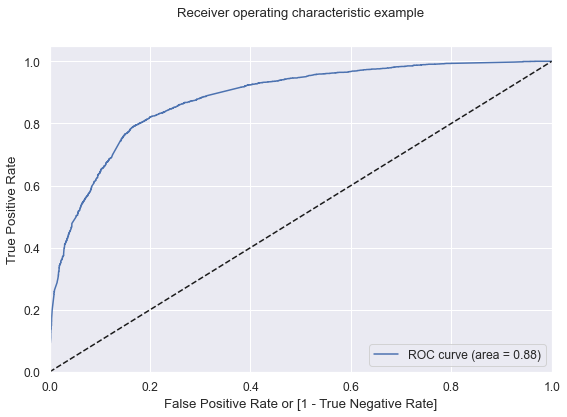

In [124]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

**`Inference: `** `ROC Value of 0.88 shows the model is performing well on Test Dataset.`

# 9.1 Finding Optimal Cutoff Point

**`Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.`**

In [125]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.361597          0    1    1    1    1    0    0    0   
1          0        0.277420          0    1    1    1    0    0    0    0   
2          0        0.515254          1    1    1    1    1    1    1    0   
3          1        0.100066          0    1    1    0    0    0    0    0   
4          0        0.414593          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

**9.1.1 Calculation of accuracy sensitivity and specificity for various probability cutoffs.**

In [126]:
cutoff_df = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
from sklearn.metrics import confusion_matrix

#True Positive
#TP = Confusion_Mat[1,1]

#True Negative
#TN = Confusion_Mat[0,0]

#False Positive
#FP = Confusion_Mat[0,1]

#False Negative
#FN = Confusion_Mat[1,0]

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i])
    total1 = sum(sum(cm1))
    Accuracy = (cm1[0, 0] + cm1[1, 1])/total1
    Specificity = cm1[0, 0]/(cm1[0, 0] + cm1[0, 1])
    Sensitivity = cm1[1, 1]/(cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, Accuracy, Sensitivity, Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.379667     1.000000     0.000000
0.1          0.1  0.608210     0.969521     0.387075
0.2          0.2  0.723791     0.924165     0.601155
0.3          0.3  0.796942     0.836357     0.772818
0.4          0.4  0.816917     0.780116     0.839440
0.5          0.5  0.804243     0.665457     0.889185
0.6          0.6  0.792258     0.587808     0.917388
0.7          0.7  0.780548     0.518142     0.941150
0.8          0.8  0.757956     0.412554     0.969354
0.9          0.9  0.712357     0.256894     0.991117


**9.1.2 Plotting Accuracy, Sensitivity, Specificity for various Probabilities**

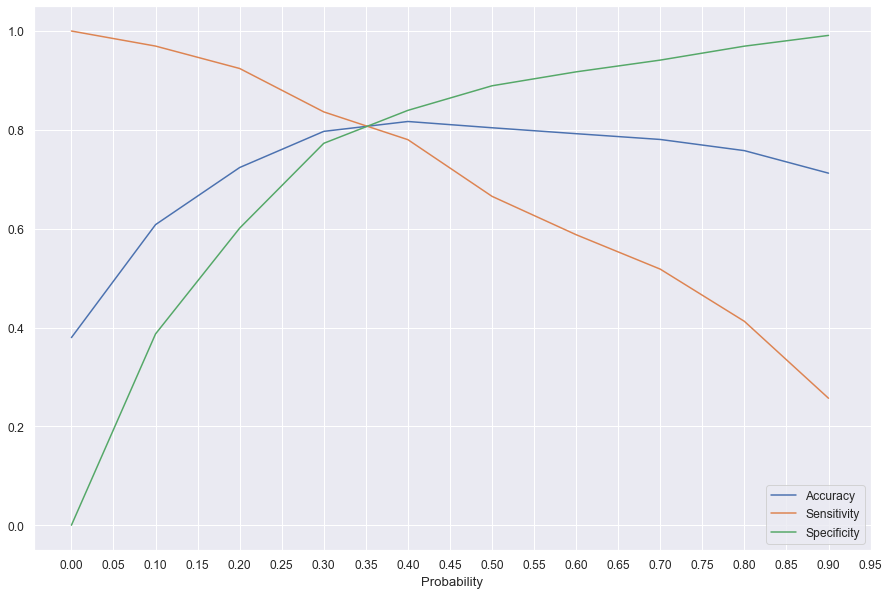

In [127]:
cutoff_df.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'], figsize = (15, 10))
plt.xticks(np.arange(0, 1, step = 0.05))
plt.show()

**`Inference: `** `From the curve above, 0.35 is the optimum point to take it as a cutoff probability.`

In [128]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
Y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.361597          0    1    1    1    1    0    0    0   
1          0        0.277420          0    1    1    1    0    0    0    0   
2          0        0.515254          1    1    1    1    1    1    1    0   
3          1        0.100066          0    1    1    0    0    0    0    0   
4          0        0.414593          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                0  
4    0    0    0                1

## 9.2 Overall Accuracy Train After Cut-Off

In [129]:
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8100289296046287

In [130]:
Confusion_Mat2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)
Confusion_Mat2

array([[3654,  849],
       [ 530, 2226]], dtype=int64)

In [131]:
#True Positive
TP = Confusion_Mat2[1,1]

#True Negative
TN = Confusion_Mat2[0,0]

#False Positive
FP = Confusion_Mat2[0,1]

#False Negative
FN = Confusion_Mat2[1,0]

In [132]:
#Sensitivity
trainSensitivity = TP/float(TP+FN)
trainSensitivity

0.8076923076923077

In [133]:
#Specificity
trainSpecificity = TN/float(TN+FP)
trainSpecificity

0.8114590273151232

In [134]:
#Calculate false positive rate- predicting converted when lead has not converted
print(FP/float(TN+FP))

0.18854097268487674


In [135]:
#Positive predicitive value
print(TP/float(TP+FP))

0.7239024390243902


In [136]:
#Negative predictive value
print(TN/float(TN+FN))

0.8733269598470363


## 9.3 Assigning Lead Roles

In [137]:
Y_train_pred_final['Lead_Score_Train'] = Y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

Y_train_pred_final.head()

Converted  Converted_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.361597          0    1    1    1    1    0    0    0   
1          0        0.277420          0    1    1    1    0    0    0    0   
2          0        0.515254          1    1    1    1    1    1    1    0   
3          1        0.100066          0    1    1    0    0    0    0    0   
4          0        0.414593          0    1    1    1    1    1    0    0   

   0.7  0.8  0.9  final_predicted  Lead_Score_Train  
0    0    0    0                1                36  
1    0    0    0                0                28  
2    0    0    0                1                52  
3    0    0    0                0                10  
4    0    0    0                1                41

## 9.4 Precesion and Recall

In [138]:
from sklearn.metrics import precision_score, recall_score
precision_train = precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
precision_train

0.7861123017573939

In [139]:
recall_train = recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
recall_train

0.6654571843251088

In [140]:
trainF1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
trainF1_score_train

0.7207702888583217

## 9.5 Precision and Recall Tradeoff

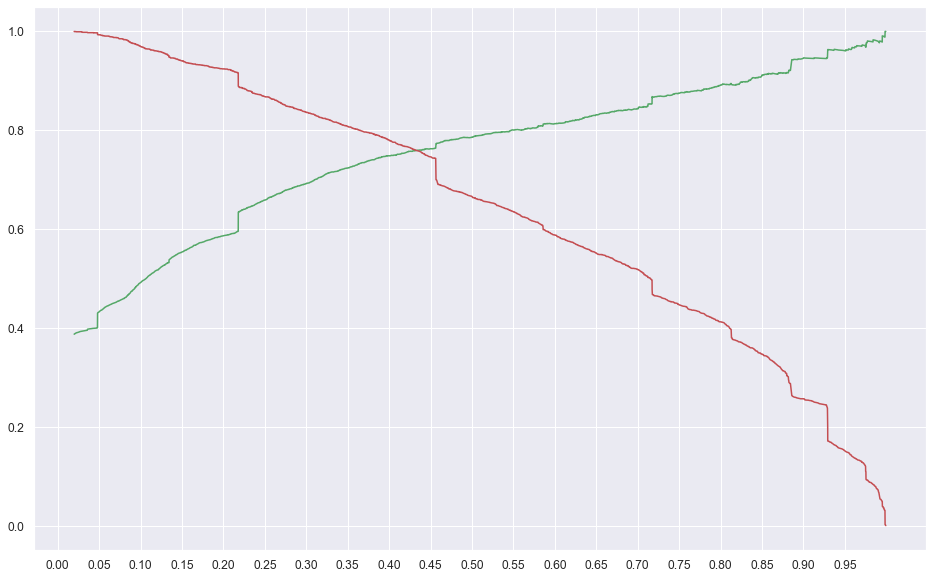

In [141]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

plt.figure(figsize = (16, 10))
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.xticks(np.arange(0, 1, step = 0.05))
plt.show()

**`Inference: `** `As per Precision-Recall Tradeoff, the cutoff is around 0.425(between 0.4 and 0.45). We can choose the cut-off as 0.45 and use the Precision-Recall-Accuracy metrics to evaluate the model.`

## 9.6 Train Data - Statistics

**9.6.1 Accuracy**

In [142]:
trainaccuracy = metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)
trainaccuracy

0.8100289296046287

**9.6.2 Precision**

In [143]:
precision_train

0.7861123017573939

**9.6.3 Recall**

In [144]:
recall_train

0.6654571843251088

**9.6.4 F1 Score**

In [145]:
trainF1_score_train

0.7207702888583217

## 9.7 Making predictions on the test set

**9.7.1 Scaling Features in the Test Data**

In [146]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1461     0.661905                    -0.771152              1.534715   
7926     0.300780                    -0.463433             -0.515062   
1909     0.661905                    -0.087331              0.138409   
8971     0.300780                     2.051510              0.976193   
5310     0.300780                    -0.714167              0.976193   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1461                                    0                          0   
7926                                    0                          0   
1909                                    1                          0   
8971                                    1                          0   
5310                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
1461                        0                     0                   1   
7926                        0                     0                   0   
1909                        0                     0                   1   
8971                        0                     0                   0   
5310                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1461                       0                           0                   0   
7926                       0                           0                   0   
1909                       0                           0                   0   
8971                       0                           0                   0   
5310                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1461                      0                           0   
7926                      0                           0   
1909                      0                           0   
8971                      0                           0   
5310                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1461                             0                            0   
7926                             0                            0   
1909                             0                            0   
8971                             0                            0   
5310                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1461                                 0                           0   
7926                                 0                           0   
1909                                 0                           1   
8971                                 0                           1   
5310                                 0                           0   

      Last Activity_Form Submitted on Website  \
1461                                        0   
7926                                        0   
1909                                        0   
8971                                        0   
5310                                        0   

      Last Activity_Had a Phone Conversation  \
1461                                       0   
7926                                       0   
1909                                       0   
8971                                       0   
5310                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
1461                                      1                             0   
7926                                      1                             0   
1909                                      0                             0   
8971                                      0                             0   
5310                                      0                 

**9.7.2 Columns in Test Data**

In [147]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       '

**9.7.3 Taking RFE support columns from the last final model in train**

In [148]:
X_test = X_test[col1]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
1461                    -0.771152                                    0   
7926                    -0.463433                                    0   
1909                    -0.087331                                    1   
8971                     2.051510                                    1   
5310                    -0.714167                                    1   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1461                          0                       0   
7926                          0                       0   
1909                          0                       0   
8971                          0                       0   
5310                          0                       0   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
1461                            0                           0   
7926                            0                           0   
1909                            0                           1   
8971                            0                           1   
5310                            0                           0   

      Last Activity_Had a Phone Conversation  \
1461                                       0   
7926                                       0   
1909                                       0   
8971                                       0   
5310                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
1461                                      1                       0   
7926                                      1                       0   
1909                                      0                       0   
8971                                      0                       0   
5310                                      0                       1   

      Specialization_Others  \
1461                      1   
7926                      1   
1909                      0   
8971                      0   
5310                      0   

      What is your current occupation_Working Professional  
1461                                                     0  
7926                                                     0  
1909                                                     0  
8971                                                     0  
5310                                                     0

**9.7.4 Check for the Shape of the Test Data**

In [149]:
X_test.shape

(1815, 11)

**9.7.5 Adding Constant**

In [150]:
X_test_sm = sm.add_constant(X_test)

In [151]:
X_test_sm.head()

const  Total Time Spent on Website  Lead Origin_Landing Page Submission  \
1461    1.0                    -0.771152                                    0   
7926    1.0                    -0.463433                                    0   
1909    1.0                    -0.087331                                    1   
8971    1.0                     2.051510                                    1   
5310    1.0                    -0.714167                                    1   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
1461                          0                       0   
7926                          0                       0   
1909                          0                       0   
8971                          0                       0   
5310                          0                       0   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
1461                            0                           0   
7926                            0                           0   
1909                            0                           1   
8971                            0                           1   
5310                            0                           0   

      Last Activity_Had a Phone Conversation  \
1461                                       0   
7926                                       0   
1909                                       0   
8971                                       0   
5310                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
1461                                      1                       0   
7926                                      1                       0   
1909                                      0                       0   
8971                                      0                       0   
5310                                      0                       1   

      Specialization_Others  \
1461                      1   
7926                      1   
1909                      0   
8971                      0   
5310                      0   

      What is your current occupation_Working Professional  
1461                                                     0  
7926                                                     0  
1909                                                     0  
8971                                                     0  
5310                                                     0

In [152]:
X_test_sm.shape

(1815, 12)

**9.7.6 Predict Y_test**

In [153]:
Y_test_pred = res9.predict(X_test_sm)

In [154]:
Y_test_pred[:10]

1461    0.018074
7926    0.025407
1909    0.184208
8971    0.717274
5310    0.250717
4774    0.217910
2084    0.217910
6351    0.158799
335     0.929228
8202    0.221158
dtype: float64

**9.7.7 Converting Y_test_pred to a DataFrame which is an array**

In [155]:
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.head()

0
1461  0.018074
7926  0.025407
1909  0.184208
8971  0.717274
5310  0.250717

**9.7.8 Converting y_test to DataFrame**

In [156]:
Y_test_df = pd.DataFrame(Y_test)

**9.7.9 Appending Y_test_df and Y_test_pred**

In [157]:
Y_pred_final = pd.concat([Y_test_df, Y_test_pred], axis = 1)
Y_pred_final.head()

Converted         0
1461          0  0.018074
7926          0  0.025407
1909          0  0.184208
8971          1  0.717274
5310          0  0.250717

**9.7.10 Renaming the Column**

In [158]:
Y_pred_final = Y_pred_final.rename(columns = {0: 'Converted_prob'})
Y_pred_final.head()

Converted  Converted_prob
1461          0        0.018074
7926          0        0.025407
1909          0        0.184208
8971          1        0.717274
5310          0        0.250717

**9.7.11 Lead Scores for Varying Cut-Off Probability**

In [159]:
prob = []
potential_leads = []
for i in np.arange(0.05, 1, 0.05):
    prob.append(i)
    potential_leads.append(sum(Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)) + 
                          sum(Y_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)))
    projected_leads = pd.DataFrame([prob, potential_leads]).T.rename(columns = {0: 'Probability Cut-Off', 
                                                                               1: 'Projected Leads'})
    

In [160]:
projected_leads

Probability Cut-Off  Projected Leads
0                  0.05           7900.0
1                  0.10           6752.0
2                  0.15           5799.0
3                  0.20           5381.0
4                  0.25           4481.0
5                  0.30           4107.0
6                  0.35           3788.0
7                  0.40           3533.0
8                  0.45           3328.0
9                  0.50           2891.0
10                 0.55           2707.0
11                 0.60           2466.0
12                 0.65           2272.0
13                 0.70           2104.0
14                 0.75           1747.0
15                 0.80           1581.0
16                 0.85           1296.0
17                 0.90            928.0
18                 0.95            554.0

In [161]:
Y_pred_final['final_predicted'] = Y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)

In [162]:
Y_pred_final['Lead_Score'] = Y_pred_final.Converted_prob.map(lambda x: round(x * 100))

## 9.8 Final Data after Prediction

In [163]:
Y_pred_final.index = Y_pred_final.index.set_names(['Cust_Id'])
Y_pred_final.head()

Converted  Converted_prob  final_predicted  Lead_Score
Cust_Id                                                        
1461             0        0.018074                0           2
7926             0        0.025407                0           3
1909             0        0.184208                0          18
8971             1        0.717274                1          72
5310             0        0.250717                0          25

In [164]:
Y_pred_final.sort_values(by = 'Converted_prob', ascending = False).head()

Converted  Converted_prob  final_predicted  Lead_Score
Cust_Id                                                        
2011             1        0.998857                1         100
6243             1        0.998744                1         100
5695             1        0.998353                1         100
5825             1        0.998353                1         100
5822             1        0.998353                1         100

In [165]:
Y_pred_final.sort_values(by = 'Converted_prob', ascending = False).tail()

Converted  Converted_prob  final_predicted  Lead_Score
Cust_Id                                                        
8793             0        0.012895                0           1
6056             0        0.012705                0           1
2898             0        0.012412                0           1
626              0        0.011936                0           1
4096             0        0.011298                0           1

**`Inference: `** 
- `We can use the Lead_Score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value. In case there are more resources available in the sales team (i.e., interns, etc.), then the score cut-off can be lowered. As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.`

## 9.9 Test Data Statistics

**9.9.1 Test Accuracy**

In [166]:
testaccuracy = metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)
testaccuracy

0.8143250688705234

**9.9.2 Confusion Matrix**

In [167]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted)
confusion2

array([[991, 145],
       [192, 487]], dtype=int64)

**9.9.3 Sensitivity**

In [168]:
#Let's see the sensitivity of our model
testsensitivity = TP/float(TP+FN)
testsensitivity

0.8076923076923077

**9.9.4 Specificity**

In [169]:
#Let us calculate specificity
testspecificity = TN/float(TN+FP)
testspecificity

0.8114590273151232

**9.9.5 Precision**

In [170]:
precision = precision_score(Y_pred_final.Converted, Y_pred_final.final_predicted)
precision

0.7705696202531646

**9.9.6 Recall**

In [171]:
recall = recall_score(Y_pred_final.Converted, Y_pred_final.final_predicted)
recall

0.7172312223858616

**9.9.7 F1 Score**

In [172]:
testF1_score = 2 * (precision * recall) / (precision + recall)
testF1_score

0.7429443173150266

## 9.10 Final Observation:

**9.10.1 Comparision of the values obtained for Train & Test:**

In [173]:
print('Train Data Accuracy        :{}%'.format(round((trainaccuracy*100), 2)))
print('Train Data Sensitivity     :{}%'.format(round((trainSensitivity*100), 2)))
print('Train Data Specificity     :{}%'.format(round((trainSpecificity*100), 2)))
print('Train Data F1 Score        :{}'.format(round((trainF1_score_train), 2)))
print('Test Data Accuracy         :{}%'.format(round((testaccuracy*100), 2)))
print('Test Data Sensitivity      :{}%'.format(round((testsensitivity*100), 2)))
print('Test Data Specificity      :{}%'.format(round((testspecificity*100), 2)))
print('Test Data F1 Score         :{}'.format(round((testF1_score), 2)))

Train Data Accuracy        :81.0%
Train Data Sensitivity     :80.77%
Train Data Specificity     :81.15%
Train Data F1 Score        :0.72
Test Data Accuracy         :81.43%
Test Data Sensitivity      :80.77%
Test Data Specificity      :81.15%
Test Data F1 Score         :0.74


**`Inference: `** `The sensitivity value on Test Data is 80.77 vs 80.77 on Train Data. The accuracy value for both Test & Train Data is around 81%. It shows that our model is performing well in test data set also and is not over-trained.`

In [174]:
from sklearn.metrics import classification_report

## 10. Classification Report

In [175]:
print(classification_report(Y_train_pred_final['Converted'], Y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4503
           1       0.72      0.81      0.76      2756

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259



**10.1 Selecting the coefficients of the selected features from our final model excluding the intercept**

In [176]:
pd.options.display.float_format = '{:.2f}'.format
new_params = round(res9.params.sort_values(ascending = False), 2)
new_params

Lead Origin_Lead Add Form                               3.91
What is your current occupation_Working Professional    2.73
Last Activity_Had a Phone Conversation                  2.65
Last Activity_SMS Sent                                  1.69
Lead Source_Olark Chat                                  1.16
Total Time Spent on Website                             1.13
Last Activity_Email Opened                              0.59
const                                                  -0.89
Lead Origin_Landing Page Submission                    -1.08
Specialization_Others                                  -1.11
Last Activity_Olark Chat Conversation                  -1.12
Last Activity_Email Bounced                            -1.43
dtype: float64

In [177]:
#Getting a relative coefficient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Lead Origin_Lead Add Form                              100.00
What is your current occupation_Working Professional    69.82
Last Activity_Had a Phone Conversation                  67.77
Last Activity_SMS Sent                                  43.22
Lead Source_Olark Chat                                  29.67
Total Time Spent on Website                             28.90
Last Activity_Email Opened                              15.09
const                                                  -22.76
Lead Origin_Landing Page Submission                    -27.62
Specialization_Others                                  -28.39
Last Activity_Olark Chat Conversation                  -28.64
Last Activity_Email Bounced                            -36.57
dtype: float64

In [178]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance, kind = 'quicksort', order = 'list of str')
sorted_idx

Lead Origin_Lead Add Form                               11
What is your current occupation_Working Professional    10
Last Activity_Had a Phone Conversation                   9
Last Activity_SMS Sent                                   8
Lead Source_Olark Chat                                   7
Total Time Spent on Website                              6
Last Activity_Email Opened                               5
const                                                    4
Lead Origin_Landing Page Submission                      3
Specialization_Others                                    2
Last Activity_Olark Chat Conversation                    1
Last Activity_Email Bounced                              0
dtype: int64

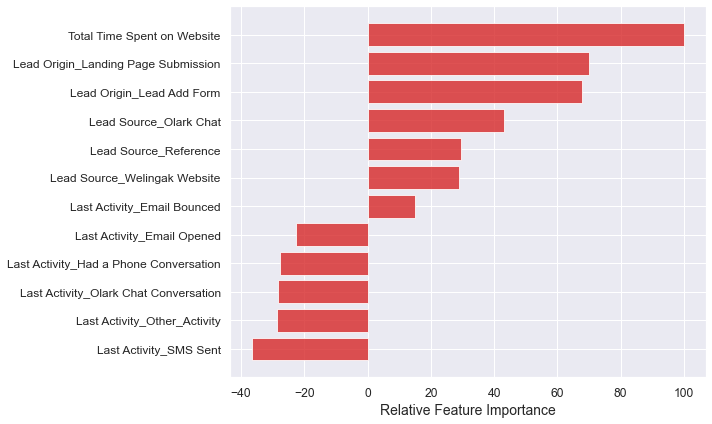

In [179]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
pos = np.arange(sorted_idx.shape[0]) + 0.5

featfig = plt.figure(figsize = (10, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align = 'center', color = 'tab:red', alpha = 0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize = 12)
featax.set_xlabel('Relative Feature Importance', fontsize = 14)

plt.tight_layout()
plt.show()

## 11. Recommendations

**`X Education Company needs to focus on folllowing key aspects to improve the overall conversion rate:`**
- `Increase user engagement on Welingak website since this helps in higher conversion.`
- `Focus on Working Professional which has high conversion certainly.`
- `Get Total Time Spent on Website increased by advertising and user experience which makes the customer engaging in the website. Since this helps in higher conversion.`
- `Improve the Olark Chat service since this is affecting the conversion negatively.`
- `Improving Lead add form also improves the lead conversion with high certainity.`